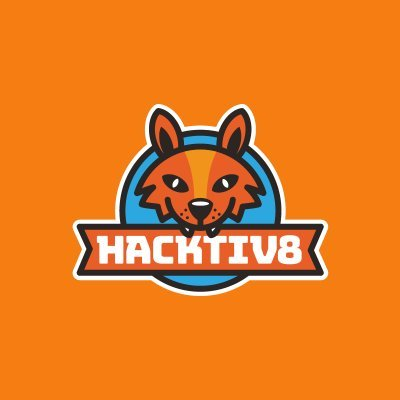

# Daftar Isi

- Perkenalan
- Import Pustaka
- Data Loading
- Data Cleaning
- Eksplorasi Data
- Data Preprocessing
- Pendefinisian model
- Pelatihan model
- Evaluasi Model
- Model Inference
- Kesimpulan

# A. Perkenalan

## Anggota Kelompok

1. PYTN-KS09-003 Johnson Rouslie Junior
2. PYTN-KS09-022 Nafiatul Risa
3. PYTN-KS09-024 Robi Dwiputra Satria

## Latar Belakang

Penyebab kematian nomor 1 didunia disebabkan oleh penyakit kardiovaskular, dimana penyakit ini sudah menelan korban sebanyak 17.9 juta setiap tahunnya. Salah satu penyakit kardiovaskular yang sering dijumpai adalah serangan jantung, dan dataset ini sudah disediakan 12 fitur yang bisa digunakan untuk memprediksi tingkat mortalitas seseorang.

Cara pencegahan penyakit kardiovaskular bisa dengan cara memperbaiki kebiasaan seperti tidak merokok, diet yang tidak seimbang, obesitas, kurangnya aktivitas dan juga kurangnya konsumsi alkohol.

Model ML dapat membantu mendeteksi adanya penyakit kardiovaskular yang dimiliki seseorang dengan melihat faktor - faktor yang ada didalam seseorang seperti apakah dia memiliki hipertensi, diabetes, dan faktor lainnya. Jika terdeteksi dengan cepat, maka penyakit ini bisa langsung dicegah dan diobati dan mencegah kematian. 

## Informasi Atribut

Berikut merupakan penjelasan tiap atribut/fitur yang ada didalam dataset:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

## Objektif

Tujuan yang akan dicapai pada Final Project ini, sebagai berikut:
- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi, dan dalam kasus ini diprediksikan apakah seseorang akan terkena serangan jantung atau tidak


---
# B. Import Pustaka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pickle
%matplotlib inline

from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE
 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

---
# C. Data Loading

**Mengambil dataset**<br>
Bagian ini akan dilakukan pengambilan dataset dan melakukan eksplorasi sederhana (Head dan Tail).

In [2]:
df_heart = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [3]:
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df_heart.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


**Mengecek nama kolom**<br>
Menampilkan kolom - kolom yang ada didalam dataset, apakah sudah sesuai atau tidak.

In [5]:
df_heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**Mengecek tipe data pada kolom**<br>
Digunakan agar dapat mengetahui jenis tipe datanya sudah sesuai atau belum

In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Mengecek besar dataset**<br>
Digunakan untuk mengetahui berapa banyak data yang ada pada dataset

In [7]:
df_heart.shape

(299, 13)

In [8]:
df_heart.size

3887

**Menampilkan statisktik sederhana**<br>
Digunakan untuk melihat apakah ada nilai yang tidak sesuai pada kolom

In [9]:
df_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


---
# D. Data Cleaning

**Mengecek jumlah null**<br>
Digunakan untuk mengecek apakah ada kolom yang menyimpan nilai null

In [10]:
df_heart.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada nilai null pada dataset ini sehingga bisa langsung dilakukan eksplorasi dataset lebih lanjut.

---
# E. Eksplorasi Data

**Visualisasi Outlier**<br>
Fungsi dibawah digunakan untuk menampilkan plot untuk melihat outlier. Plot yang digunakan terdiri dari Histogram, Probability Plot, dan Boxplot.

In [11]:
plt.rcParams['patch.linewidth'] = 2
plt.rcParams['patch.edgecolor'] = 'white'
colors = ['#0343DF', '#7E1E9C']
sns.set_palette(sns.color_palette(colors))
def diagnostic_plot(df, col, name):
    kurtosis = ["Kurtosis : {}".format(stats.kurtosis(df_heart[col], axis=0, bias=True))]
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], bins=10, kde=True, alpha=0.5)
    plt.title('Histogram')
    plt.legend(labels=kurtosis, prop={'size':12})
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[col])
    plt.title('Boxplot')
    
    plt.suptitle('Outlier of {}'.format(name))
    plt.show()

**Daftar Visualisasi**

1. Fitur Umum (dibagi menjadi 3 sub-bab):
    - Umur
    - Kelamin
    - Waktu
2. Fitur Problem (digabung menjadi 1 sub-bab):
    - Anemia
    - Diabetes
    - Darah Tinggi
    - Merokok
3. Fitur Teknikal (digabung menjadi 1 sub-bab):
    - Creatinine Phosphokinase
    - Ejection Fraction
    - Platelets
    - Serum Creatinine
    - Serum Sodium

## 1. Fitur Umur

### Tujuan

Tujuan sub-bagian ini untuk melihat korelasi antara fitur age dengan label DEATH_EVENT.

### Visualisasi

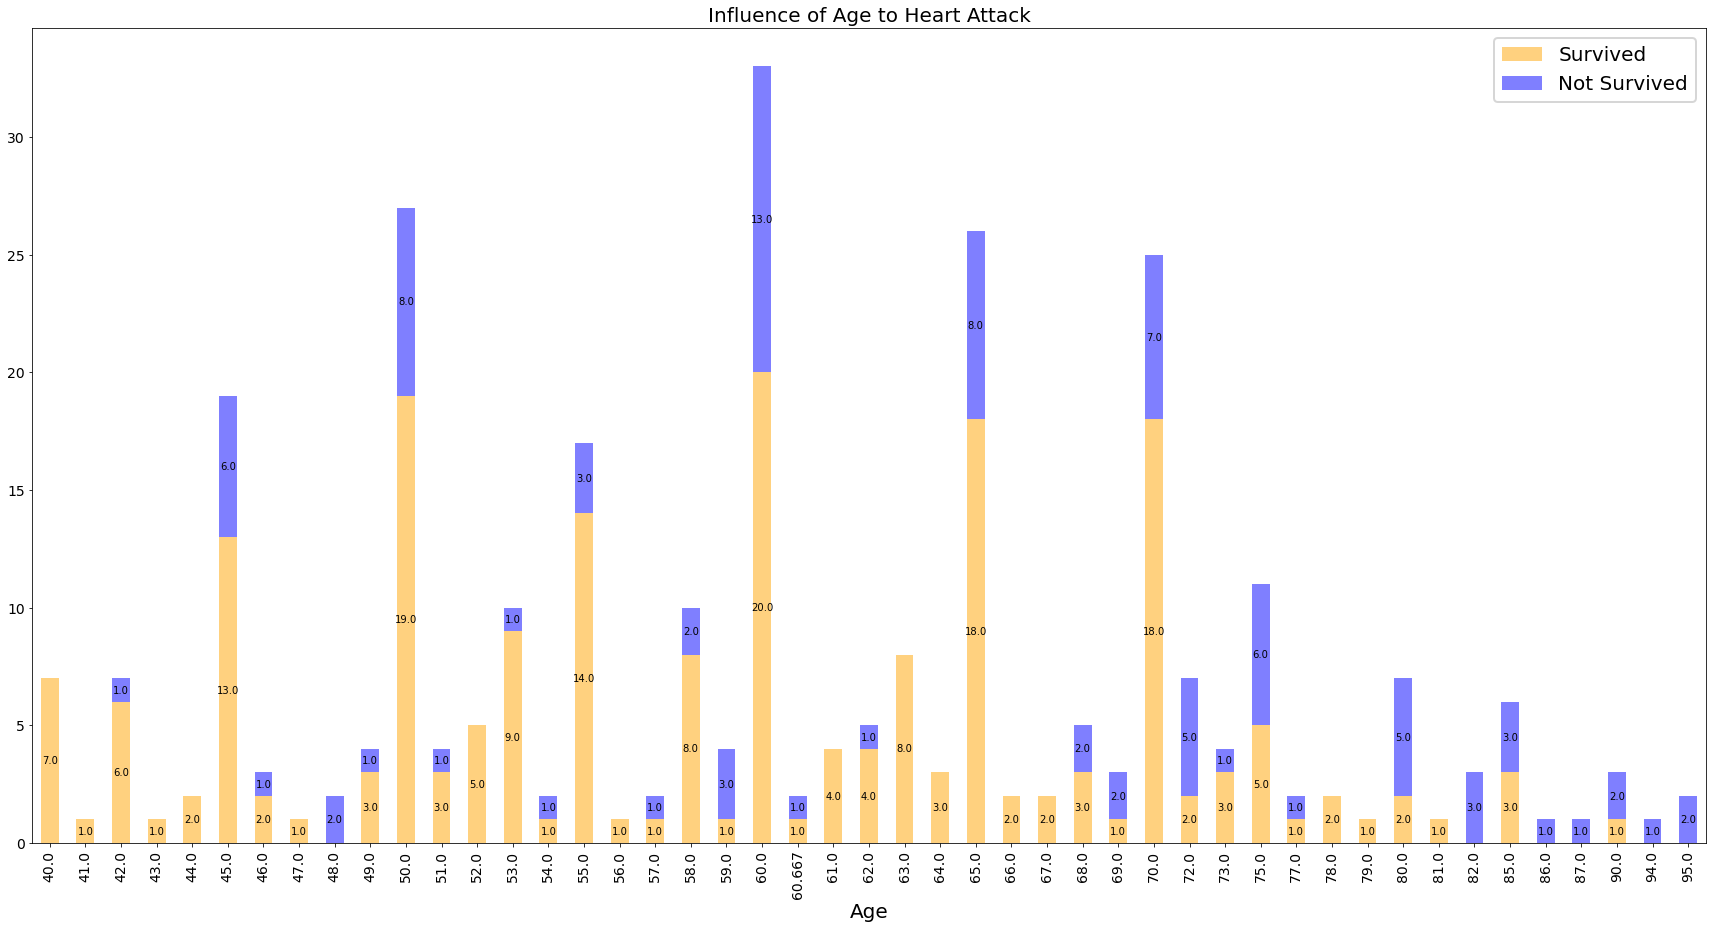

In [12]:
df_age = df_heart.pivot_table(
    index='age',
    columns='DEATH_EVENT',
    values='time', #tidak ada tujuan menggunakan time, dikarenakan kita hanya ingin mengambil nilai count baris, jadi kolom apapun bisa digunakan.
    aggfunc='count'
)
plot = df_age.plot(kind='bar', stacked=True, figsize=(30, 15), color=['orange', 'blue'], alpha=0.5)
L = plt.legend(prop={'size':20})
L.get_texts()[0].set_text('Survived')
L.get_texts()[1].set_text('Not Survived')
plt.title('Influence of Age to Heart Attack', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for mean in plot.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in mean]
    plot.bar_label(mean, labels=labels, label_type='center')
plt.show()

**Outlier**

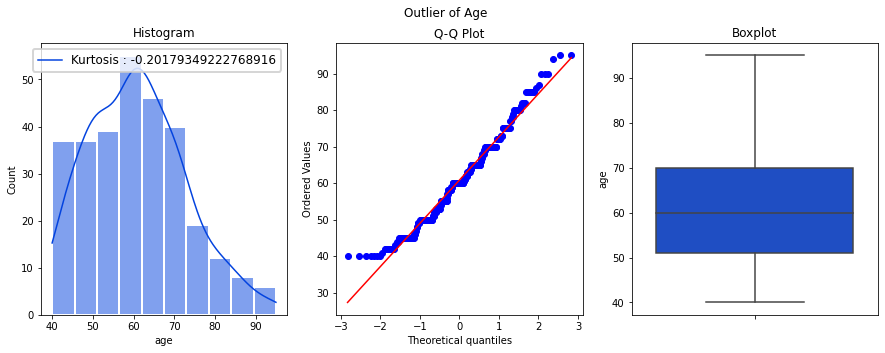

In [13]:
diagnostic_plot(df_heart, 'age', 'Age')

### Analisis

1. Jika dilihat dari hasil visualisasi tersebut, umur diatas 70 memiliki tingkat kematian yang jauh lebih banyak dibandingkan yang hidup, berbeda dengan umur 40-70 dimana lebih banyak yang hidup dibandingkan dengan yang mati. Bisa disimpulkan semakin tua seseorang, maka kemungkinan mati dikarenakan serangan jantung cukup tinggi.
2. Plot histogram menghasilkan bentuk distribusi yang lebih condong ke kiri yang artinya distribusi data untuk umur 40-70 lebih banyak dibandingkan diatas 70. Kurtosis dibawah nilai 3 yang artinya data pada fitur age memiliki sedikit outlier.
3. Q-Q Plot menunjukkan bahwa datanya light-tailed yang artinya kemungkinan munculnya nilai besar pada variabel cukup kecil.
4. Boxplot tidak menunjukkan adanya outlier.

## 2. Fitur Kelamin

### Tujuan

Tujuan sub-bagian ini untuk melihat korelasi antara fitur sex dengan label DEATH_EVENT.

### Visualisasi

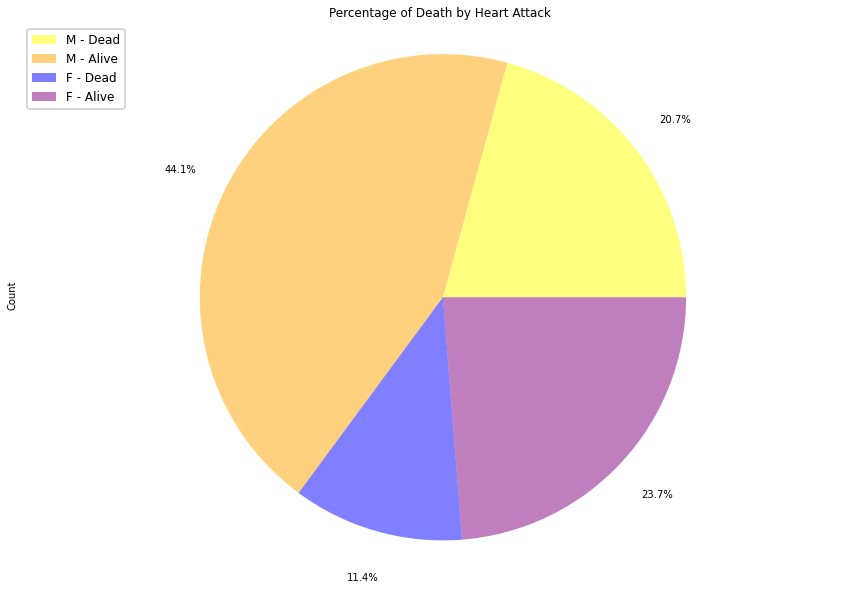

In [14]:
m = df_heart[df_heart['sex'] == 1]
f = df_heart[df_heart['sex'] == 0]
m_dead = len(m[m['DEATH_EVENT'] == 1])
m_alive = len(m[m['DEATH_EVENT'] == 0])
f_dead = len(f[f['DEATH_EVENT'] == 1])
f_alive = len(f[f['DEATH_EVENT'] == 0])

values = pd.DataFrame([m_dead, m_alive, f_dead, f_alive], columns={'Count'})
values['Count'].plot(kind="pie", 
                     figsize=(15,10), 
                     autopct="%1.1f%%",
                     pctdistance=1.2, 
                     labels=None, 
                     colors=['yellow','orange','blue','purple'], 
                     wedgeprops = {"alpha": 0.5})
labels = ['M - Dead', 'M - Alive', 'F - Dead', 'F - Alive']
plt.title("Percentage of Death by Heart Attack")
plt.axis("equal")
plt.legend(labels=labels, loc="upper left", prop={'size':12})
plt.show()

In [15]:
print('Total of Male : {}'.format(len(m)))
print('Total of Female : {}'.format(len(f)))

Total of Male : 194
Total of Female : 105


**Outlier**

Tidak perlu dilihat outliernya dikarenakan fitur sex hanya memiliki nilai 0 dan 1

### Analisis

Jika dilihat dari hasil visualisasi tersebut, bisa disimpulkan gender memiliki pengaruh yang kecil terhadap kematian dikarenakan pria dan wanita sama - sama memiliki kemungkinan hidup yang tinggi. Di visualisasi dapat dilihat bahwa persentase pria lebih besar, tetapi ini dikarenakan jumlah pria lebih banyak hampir 2 kali dari wanita.  

## 3. Fitur Waktu

### Tujuan

Tujuan sub-bagian ini untuk melihat apakah ada pengaruh waktu follow-up terhadap keselamatan seseorang yang terkena serangan jantung.

### Visualisasi

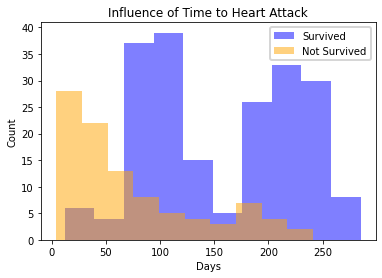

In [16]:
colnames = ['Anemic', 'Diabetic', 'Hypertension', 'Smoking']
df_heart[df_heart["DEATH_EVENT"] == 0]['time'].plot(kind='hist', color='blue', label='Survived', alpha=0.5)
df_heart[df_heart["DEATH_EVENT"] == 1]['time'].plot(kind='hist', color='orange', label='Not Survived', alpha=0.5)
plt.title('Influence of Time to Heart Attack')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

**Outlier**

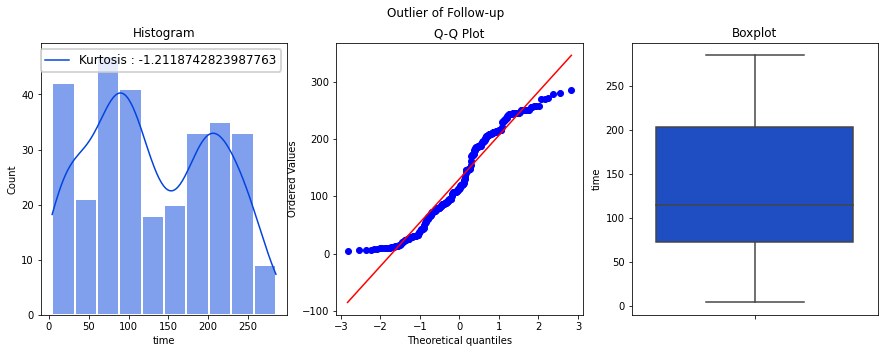

In [17]:
diagnostic_plot(df_heart, 'time', 'Follow-up')

### Analisis

Jika dilihat dari hasil visualisasi tersebut, dapat disimpulkan:
1. Resiko terjadi serangan jantung jauh lebih kecil jika sudah lama dilakukan follow-up (bantuan), tetapi jika bantuannya baru beberapa hari, biasanya banyak yang sudah meninggal. Sehingga time memiliki pengaruh terhadap serangan jantung.
2. Histogram menunjukkan bahwa kolom ini merupakan distribusi bimodal dimana puncak pertama di ~100, dan puncak kedua di ~200. Selain itu kurtosisnya dibawah 3 yang menunjukkan adanya sedikit outlier.
3. Q-Q plot menunjukkan juga bahwa memang distribusinya adalah bimodal. Dapat dilihat ada sedikit outlier pada 0 dan ~290.
4. Pada boxplot tidak menunjukkan adanya outlier yang artinya outlier yang diperlihatkan oleh Q-Q plot hanya merupakan angka minimum dan maximumnya.

## 4. Fitur Anaemia, Diabetes, Darah Tinggi, dan Merokok

### Tujuan

Tujuan sub-bagian ini untuk melihat apakah seseorang yang memiliki anemia, diabetes, darah tinggi, maupun merokok memiliki resiko terkena serangan jantung lebih tinggi dibandingkan dengan yang tidak.

### Visualisasi

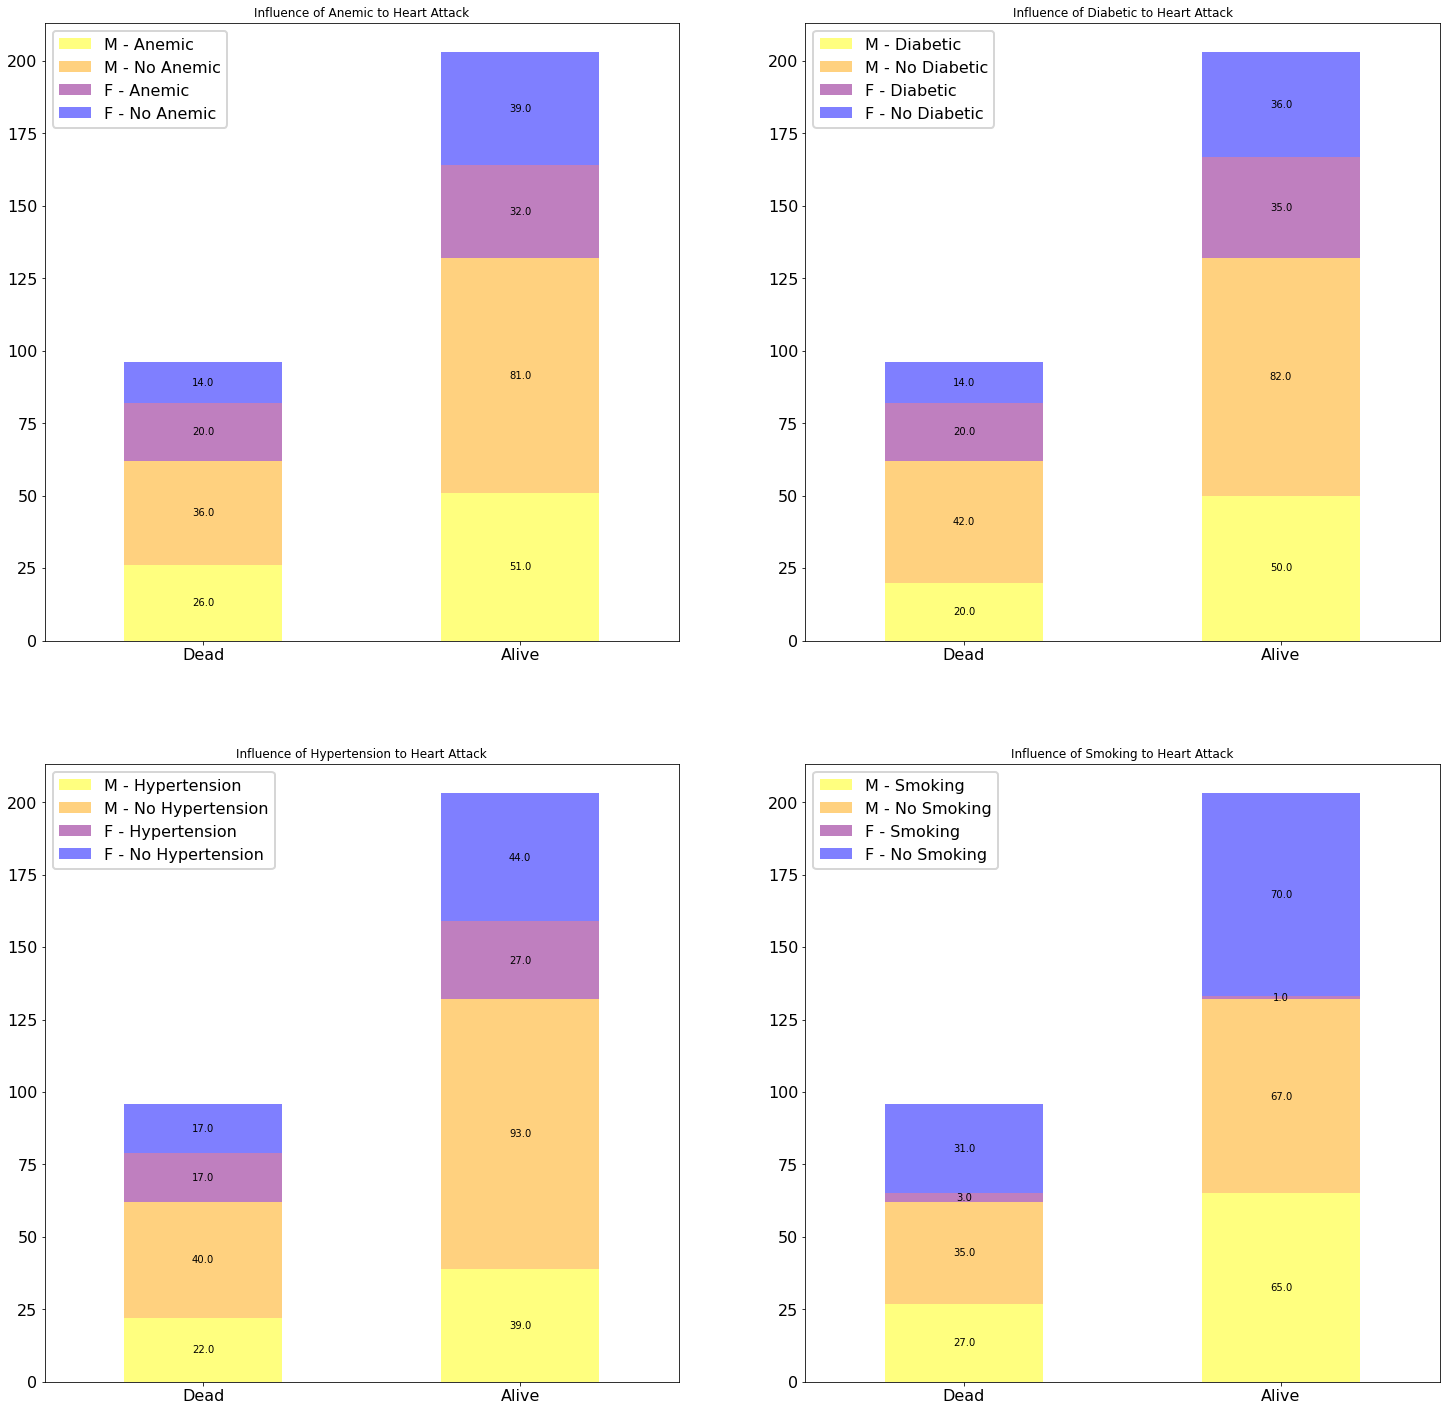

In [18]:
fig = plt.figure(figsize=(25, 25))
columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
colnames = ['Anemic', 'Diabetic', 'Hypertension', 'Smoking']
for i in range(len(columns)):
    m_problem = m[m[columns[i]] == 1]
    m_noproblem = m[m[columns[i]] == 0]
    m_problem_dead = len(m_problem[m_problem['DEATH_EVENT'] == 1])
    m_problem_alive = len(m_problem[m_problem['DEATH_EVENT'] == 0])
    m_noproblem_dead = len(m_noproblem[m_noproblem['DEATH_EVENT'] == 1])
    m_noproblem_alive = len(m_noproblem[m_noproblem['DEATH_EVENT'] == 0])

    f_problem = f[f[columns[i]] == 1]
    f_noproblem = f[f[columns[i]] == 0]
    f_problem_dead = len(f_problem[f_problem['DEATH_EVENT'] == 1])
    f_problem_alive = len(f_problem[f_problem['DEATH_EVENT'] == 0])
    f_noproblem_dead = len(f_noproblem[f_noproblem['DEATH_EVENT'] == 1])
    f_noproblem_alive = len(f_noproblem[f_noproblem['DEATH_EVENT'] == 0])

    dead = [m_problem_dead, m_noproblem_dead, f_problem_dead, f_noproblem_dead]
    alive = [m_problem_alive, m_noproblem_alive, f_problem_alive, f_noproblem_alive]
    df_problem = pd.DataFrame(
        [dead, alive], 
        columns=['M - {}'.format(colnames[i]), 
                 'M - No {}'.format(colnames[i]), 
                 'F - {}'.format(colnames[i]), 
                 'F - No {}'.format(colnames[i])], 
        index=['Dead', 'Alive'])
    ax = fig.add_subplot(2, 2, i+1)
    plot = df_problem.plot(kind='bar', stacked=True, ax=ax, color=['yellow', 'orange', 'purple', 'blue'], alpha=0.5)
    ax.set_title('Influence of {} to Heart Attack'.format(colnames[i]))
    ax.legend(prop={'size':16})
    plt.xticks(fontsize=16, rotation=360)
    plt.yticks(fontsize=16)
    for mean in plot.containers:
        labels = [v.get_height() if v.get_height() > 0 else '' for v in mean]
        plot.bar_label(mean, labels=labels, label_type='center')

plt.show()

**Outlier**

Tidak perlu dilihat outliernya dikarenakan fitur - fitur tersebut hanya memiliki nilai 0 dan 1

### Analisis

Jika dilihat dari hasil visualisasi tersebut, dapat disimpulkan:
1. Keempat visualisasi tersebut menunjukkan bahwa jumlah yang anemia, diabetes, hipertensi, dan merokok memiliki jumlah yang lebih rendah dibandingkan yang tidak anemia, tidak diabetes, tidak hipertensi, dan tidak merokok.
2. Kemungkinan terkena serangan jantung hampir sama bagi mereka yang anemia, diabetes, hipertensi, maupun merokok dengan yang tidak. Dapat disimpulkan keempat fitur ini tidak memiliki korelasi yang kuat terhadap kemungkinan terjadinya serangan jantung.

## 5. Fitur Teknikal
Fitur yang dimaksud disini adalah fitur yang tidak mudah dimengerti oleh orang awam. Fitur tersebut yaitu creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, dan serum_sodium.

In [19]:
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Tujuan

Tujuan sub-bagian ini untuk melihat apakah jumlah creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, maupun serum_sodium mempengaruhi kemungkinan terkena serangan jantung lebih tinggi dibandingkan dengan yang tidak.

### Visualisasi

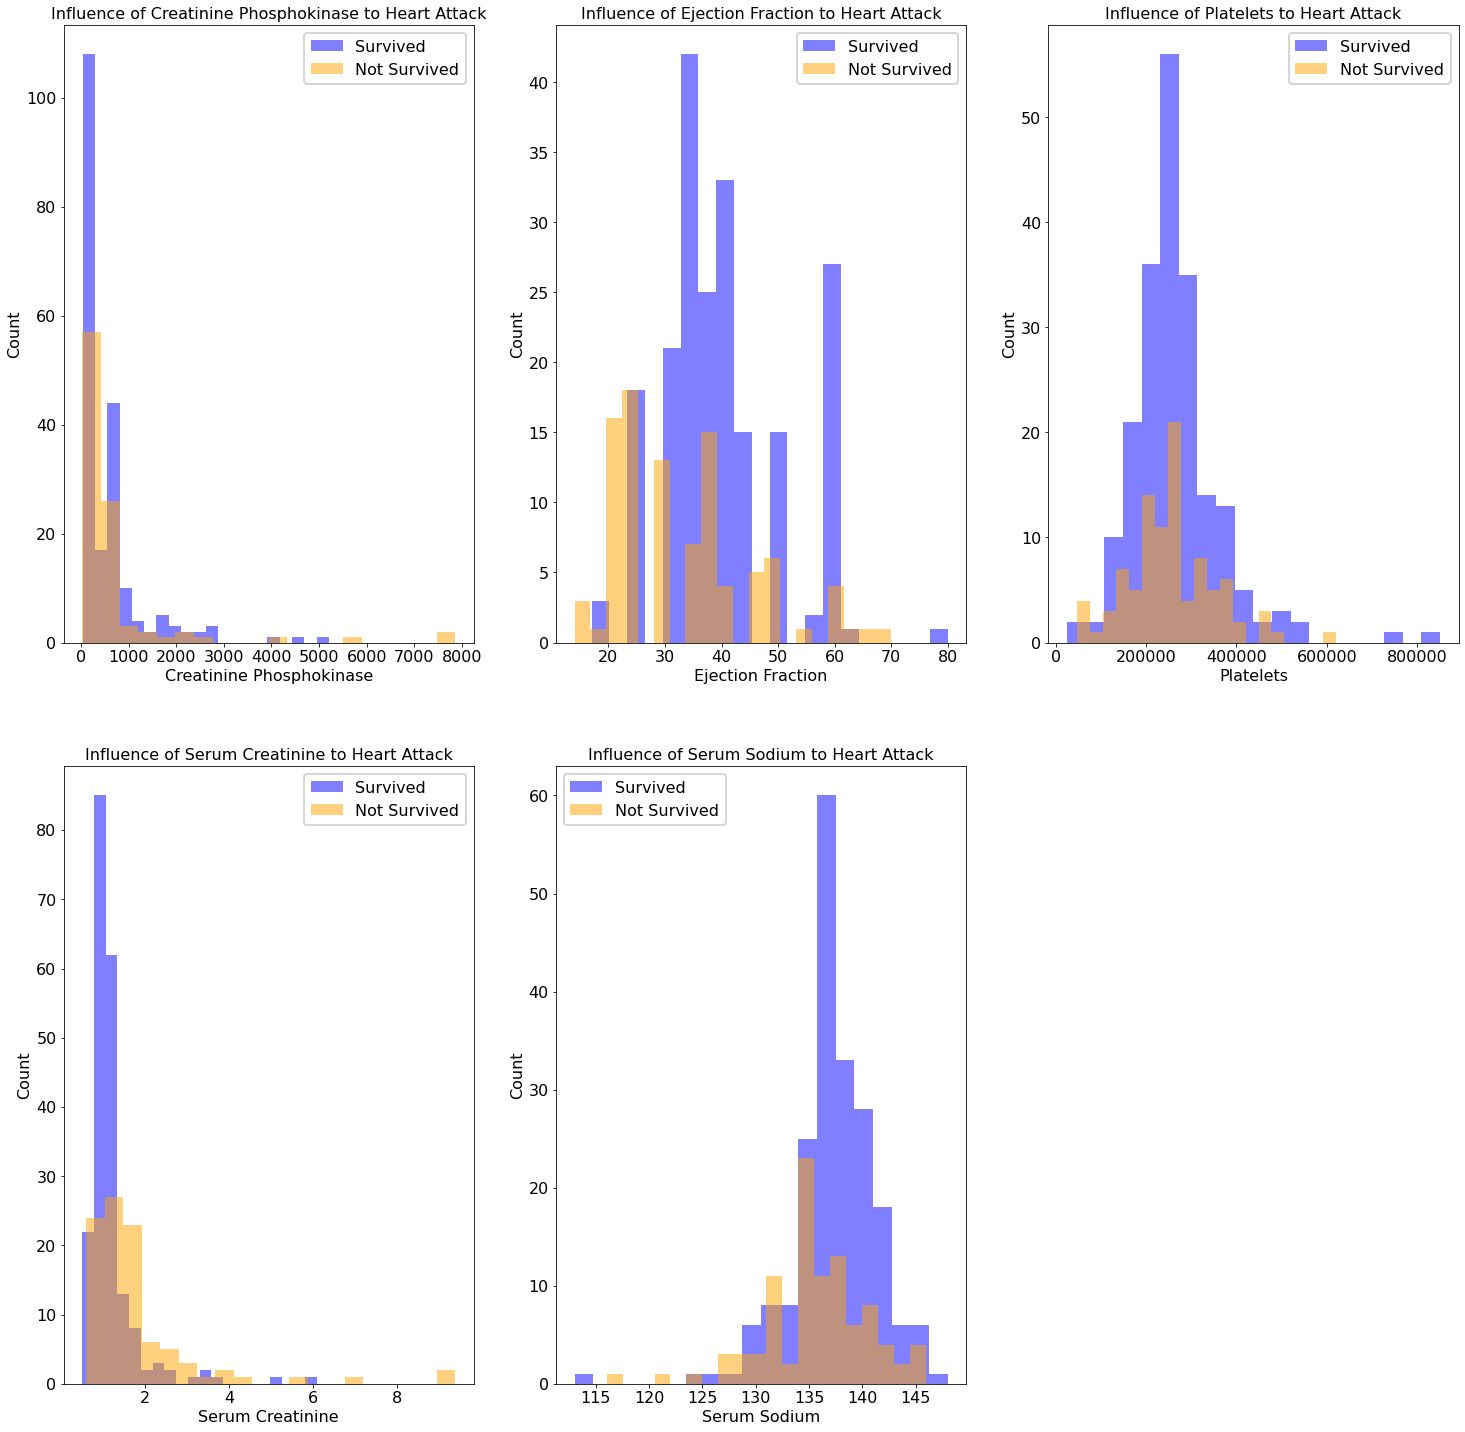

In [20]:
columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
colnames = ['Creatinine Phosphokinase', 'Ejection Fraction', 'Platelets', 'Serum Creatinine', 'Serum Sodium']
fig = plt.figure(figsize=(25, 25))
for i in range(len(columns)):
    plt.subplot(2, 3, i+1)
    df_heart[df_heart["DEATH_EVENT"] == 0][columns[i]].plot(kind='hist', bins=20, color='blue', label='Survived', alpha=0.5)
    df_heart[df_heart["DEATH_EVENT"] == 1][columns[i]].plot(kind='hist', bins=20, color='orange', label='Not Survived', alpha=0.5)
    plt.title('Influence of {} to Heart Attack'.format(colnames[i]), fontsize=16)
    plt.legend(prop={'size':16})
    plt.xlabel(colnames[i], fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

**Outlier**

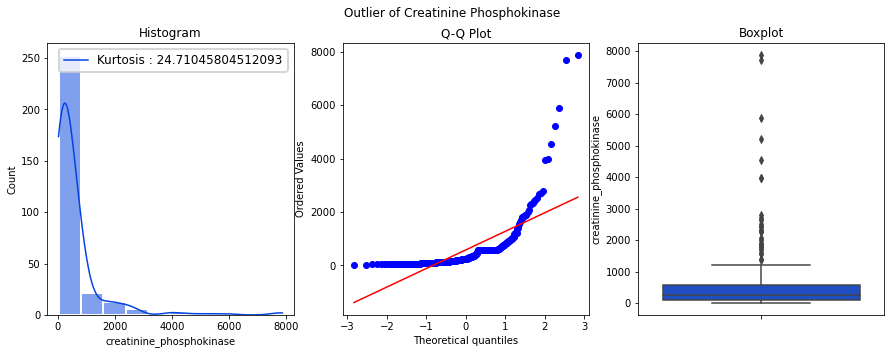

In [21]:
diagnostic_plot(df_heart, 'creatinine_phosphokinase', 'Creatinine Phosphokinase')

**Analisis Fitur Creatinine Phosphokinase**<br>
1. Hasil visualisasi histogram menunjukkan bahwa jumlah Creatinine Phosphokinase yang rendah dapat mengurangi kemungkinan terkena serangan jantung. Sehingga jumlah Creatinine Phosphokinase ada korelasi dengan serangan jantung.
2. Jika dilihat pada bagian outlier histogram, kurtosisnya melebihi nilai 3 yang artinya banyak outlier pada kolom ini.
3. Pada bagian outlier Q-Q plot menunjukkan positive skewness dengan beberapa outlier di jumlah 4000-8000. Selain positive skewness, dapat dilihat juga bahwa plot ini lumayan heavy-tailed.
4. Boxplot juga menunjukkan adanya outlier pada kolom ini.
5. Munculnya outlier pada kolom ini dikarenakan ada beberapa pasien yang memiliki kadar jumlah CPK yang tinggi, yang mungkin disebabkan oleh luka atau stress pada bagian otot, bagian jantung, atau pada bagian otak. Oleh sebab itu juga outlier ini tidak dihapus. Bisa dilihat jika jumlah CPK sangat tinggi, maka kemungkinan hidupnya sangat minim.

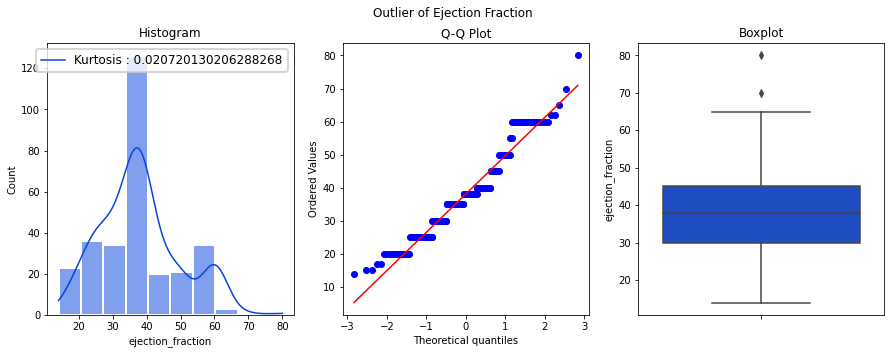

In [22]:
diagnostic_plot(df_heart, 'ejection_fraction', 'Ejection Fraction')

**Analisis Fitur Ejection Fraction**<br>
1. Hasil visualisasi histogram menunjukkan bahwa semakin tinggi persentase Ejection Fraction-nya, maka semakin tinggi kemungkinan hidup seseorang. Jika persentase sudah dibawah 30, maka resiko terkena serangan jantung jauh lebih tinggi. Bisa disimpulkan bahwa Ejection Fraction memiliki pengaruh terhadap kemungkinan terjadinya serangan jantung.
2. Jika dilihat pada bagian outlier histogram, kurtosisnya dibawah nilai 3 yang artinya banyak outlier pada kolom ini.
3. Pada bagian outlier Q-Q plot menunjukkan normal distribution dengan sedikit outlier diangka 80.
4. Boxplot juga menunjukkan adanya outlier pada kolom ini meskipun sangat sedikit.
5. Munculnya outlier pada kolom ini dikarenakan ada yang memiliki angka EF yang tinggi yaitu diatas 75% dan dibawah 80%, kondisi ini menunjukkan bahwa jantung seseorang sehat. Jumlah EF yang normal berada disekitar 50% - 75%. Outlier juga tidak dihapus dikarenakan menunjukkan juga bahwa semakin tinggi EF maka kemungkinan terkena serangan jantung jauh lebih kecil.


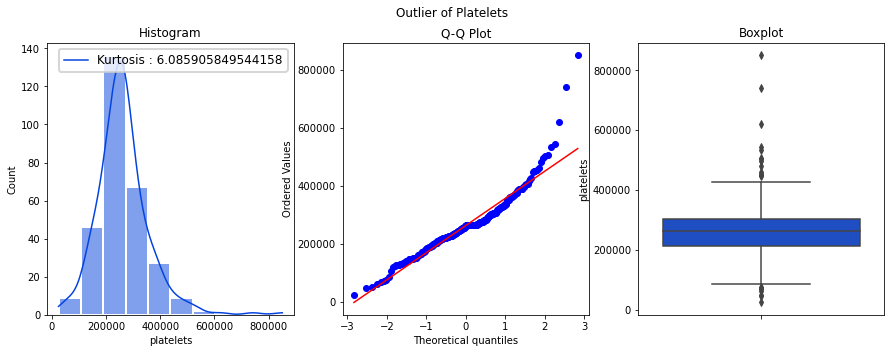

In [23]:
diagnostic_plot(df_heart, 'platelets', 'Platelets')

**Analisis Fitur Platelets**<br>
1. Hasil visualisasi histogram menunjukkan bahwa jumlah Platelet tidak terlalu mempengaruhi terhadap serangan jantung dikarenakan tidak adanya jumlah perbedaan yang signifikan dengan yang mati dengan yang tidak.
2. Jika dilihat pada bagian outlier histogram, kurtosisnya melebihi nilai 3 yang artinya banyak outlier pada kolom ini.
3. Pada bagian outlier Q-Q plot menunjukkan normal distribution, tetapi beda dengan outlier histogram, disini dapat dilihat bahwa outliernya cukup sedikit. Outliernya terletak pada angka 600000-800000.
4. Boxplot juga menunjukkan adanya outlier pada kolom ini. Berbeda dengan Q-Q plot, dapat dilihat bahwa ada outlier lagi yaitu pada posisi 400000-600000 dan juga dibawah 100000.
5. Munculnya outlier pada kolom ini dikarenakan ada beberapa pasien yang memiliki kadar jumlah platelet yang sedikit maupun sangat banyak, hal ini disebabkan karena pasien terkena anemia jika jumlah plateletnya kecil, atau adanya inflamasi jika jumlah plateletnya banyak. Outlier tidak dihapus dikarenakan jumlah tersebut adalah hal yang normal.


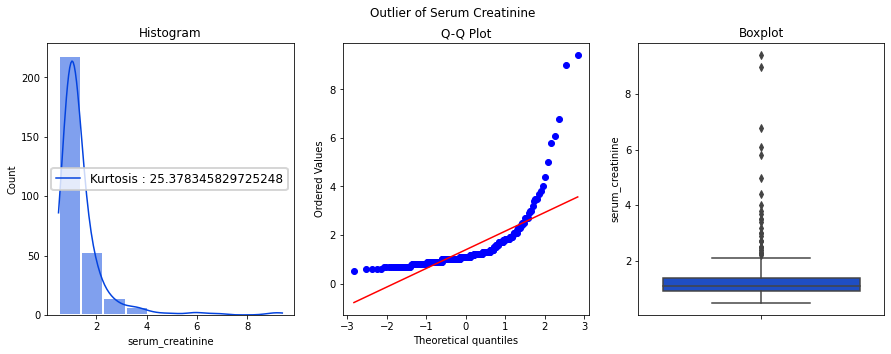

In [24]:
diagnostic_plot(df_heart, 'serum_creatinine', 'Serum Creatinine')

**Analisis Fitur Serum Creatinine**<br>
1. Hasil visualisasi histogram menunjukkan bahwa jumlah Serum Creatinine yang sudah diatas 1 mg/dL memiliki resiko terkena serangan jantung. Bisa disimpulkan jumlah Serum Creatinine memiliki pengaruh terhadap serangan jantung.
2. Jika dilihat pada bagian outlier histogram, kurtosisnya melebihi nilai 3 yang artinya banyak outlier pada kolom ini.
3. Pada bagian outlier Q-Q plot menunjukkan positive skewness dengan beberapa outlier di jumlah 4-10.
4. Boxplot juga menunjukkan adanya outlier pada kolom ini dari 2-10.
5. Munculnya outlier pada kolom ini dikarenakan ada beberapa pasien yang memiliki kadar jumlah SC yang tinggi, yang disebabkan oleh fungsi ginjal yang sudah memburuk. Semakin tinggi kadar SC nya berarti ginjal tersebut sudah lama rusak. Outlier tidak dihapus karena angka SC yang tinggi memiliki resiko terkena serangan jantung yang lebih tinggi pula.


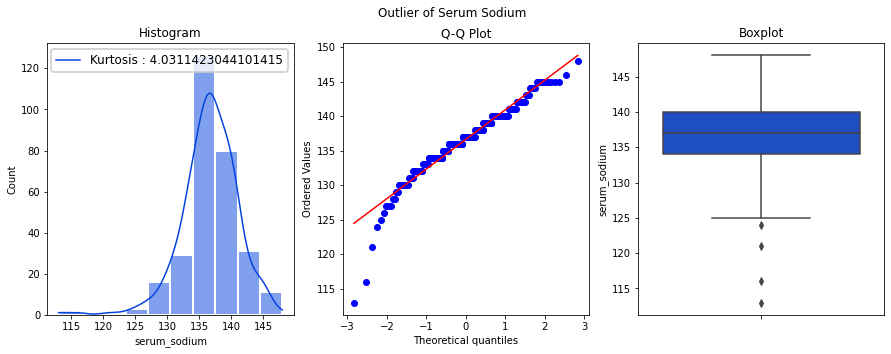

In [25]:
diagnostic_plot(df_heart, 'serum_sodium', 'Serum Sodium')

**Analisis Fitur Serum Sodium**<br>
1. Hasil visualisasi histogram menunjukkan bahwa jumlah Serum Sodium yang rendah dapat meningkatkan kemungkinan terkena serangan jantung. Sehingga jumlah Serum Sodium ada korelasi dengan serangan jantung.
2. Jika dilihat pada bagian outlier histogram, kurtosisnya melebihi nilai 3 yang artinya banyak outlier pada kolom ini.
3. Pada bagian outlier Q-Q plot menunjukkan normal distribution dengan outlier di jumlah 115-125.
4. Boxplot juga menunjukkan adanya outlier pada kolom ini.
5. Munculnya outlier pada kolom ini dikarenakan ada beberapa pasien yang memiliki kadar jumlah SS yang rendah dari biasanya. Jumlah SS yang rendah menyebabkan kondisi Hyponatremia yang meningkatkan resiko terkena serangan jantung. Oleh sebab itu outlier tidak dihapus.


## 6. Correlation Matrix

### Tujuan

Correlation Matrix bertujuan untuk memperlihatkan fitur apa saja yang memiliki kaitan yang kuat terhadap label DEATH_EVENT.

### Visualisasi

Visualisasi pertama ini menunjukkan korelasinya secara keseluruhan

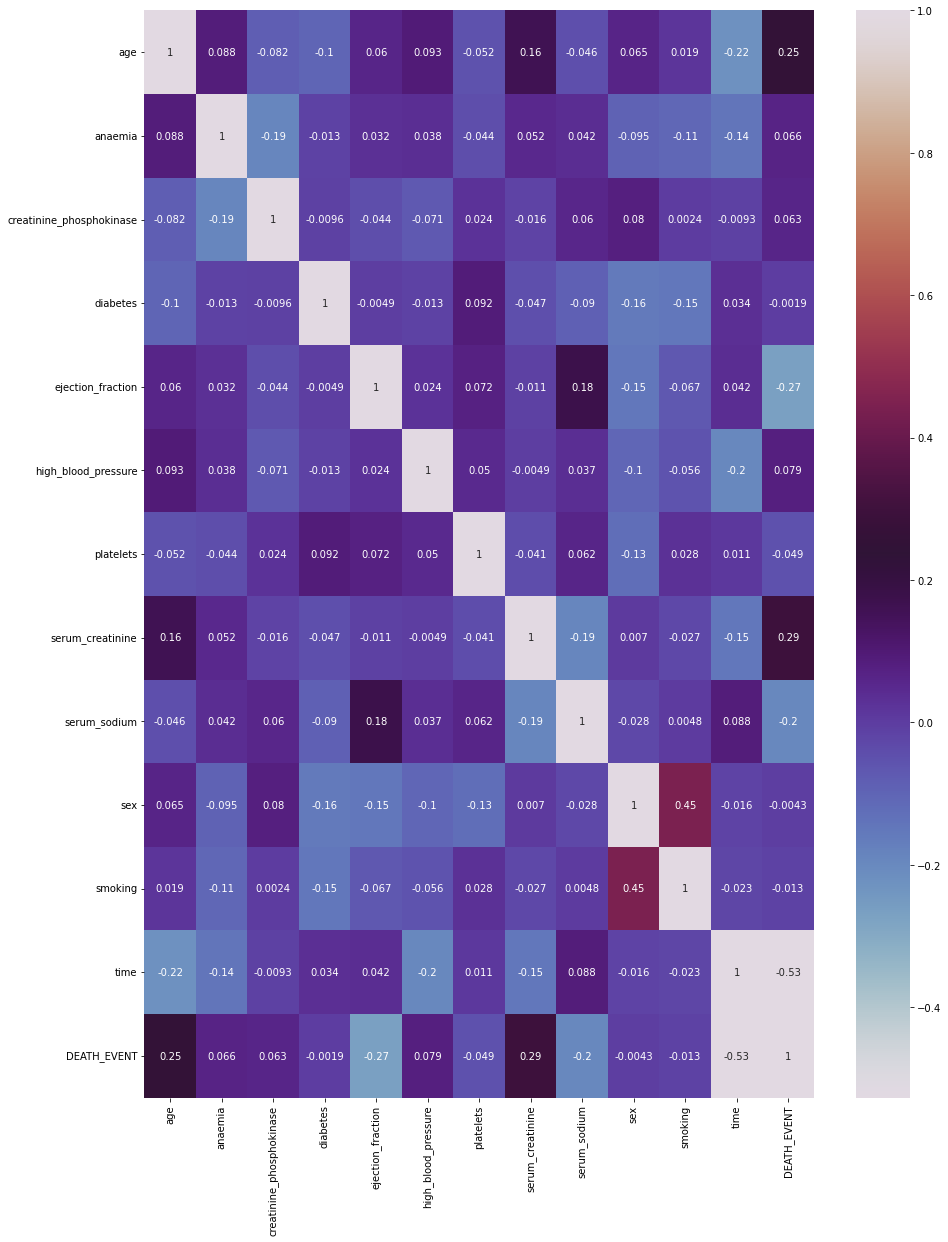

In [26]:
plt.figure(figsize=(15,20))
sns.heatmap(df_heart.corr(), annot=True, cmap='twilight')
plt.show()

Visualisasi kedua untuk menunjukkan perbedaan korelasi antar satu sama lain sehingga lebih mudah dilihat

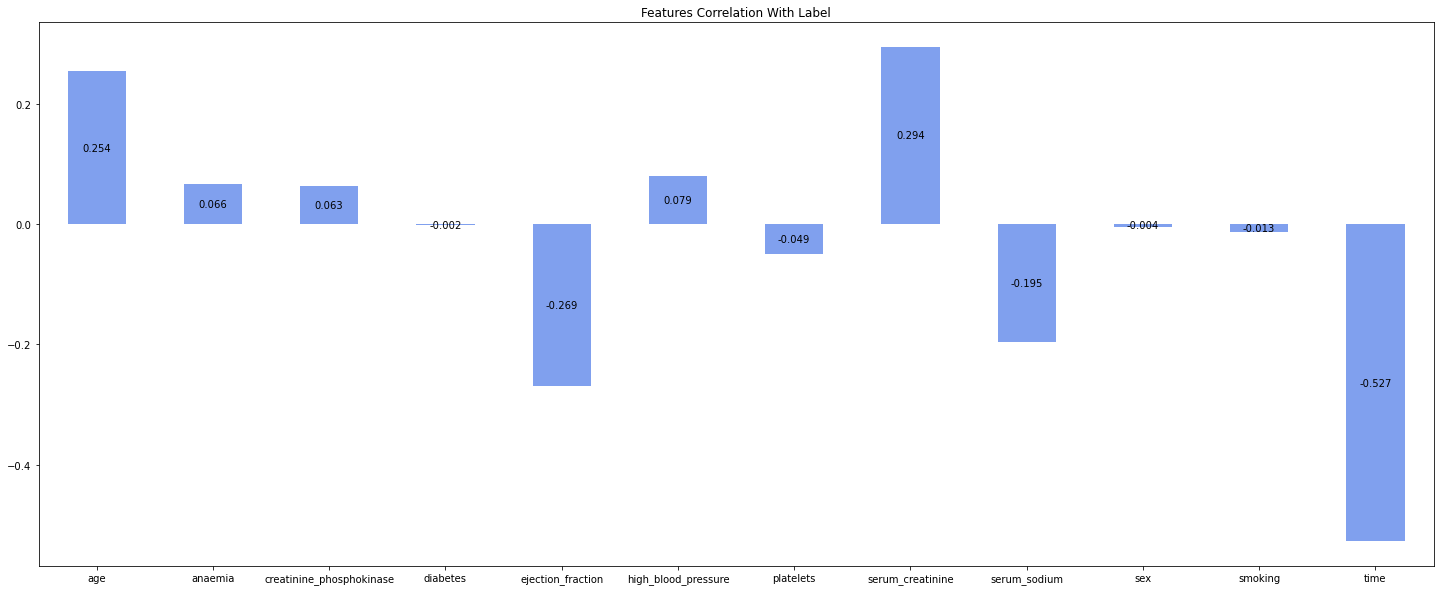

In [27]:
fig,ax = plt.subplots(figsize=(25,10))
correlation = df_heart.drop(columns=['DEATH_EVENT'], inplace=False).corrwith(df_heart.DEATH_EVENT)
plot = correlation.plot.bar(title='Features Correlation With Label', alpha=0.5);
plt.xticks(rotation=360)
for mean in plot.containers:
    labels = [round(v.get_height(),3) for v in mean]
    plot.bar_label(mean, labels=labels, label_type='center')

### Analisis

Dari hasil visualisasi korelasi tersebut, bisa disimpulkan bahwa time memiliki korelasi terkuat terhadap label, dan diabetes yang memiliki korelasi terkecil terhadap label.

Urutan fitur dari yang korelasi terbesar sampai terkecil:
1. time
2. serum_creatinine
3. ejection_fraction
4. age
5. serum_sodium
6. high_blood_pressure
7. anaemia
8. creatinine_phosphokinase
9. platelets
10. smoking
11. sex
12. diabetes

---
# F. Data Preprocessing

Berikut langkah-langkah yang digunakan pada data preprocessing:
1. Melakukan feature selection
2. Menangani Ketidakseimbangan Kelas menggunakan SMOTE
3. Menangani Skewness menggunakan Transformasi Box-Cox
4. Melakukan penyetelan hyperparameter menggunakan RandomizedSearchCV

## 1. Melakukan feature selection

Dengan menggunakan algoritma Random Forest, kepentingan fitur dapat diukur sebagai **rata-rata penurunan impuritas** yang dihitung dari ___decision trees___ (semua pohon keputusan) dalam sebuah ___forest___ (hutan kecil).

**Sebelum memilih fitur yang akan digunakan, terlebih dahulu dilakukan pemisahan variabel independen (prediktor) dan variabel dependen (hasil)**

In [28]:
X = df_heart.iloc[:, :-1]
y = df_heart.iloc[:, -1]

Melakukan pelatihan algoritma Random Forest classifier dan  menggunakan random state untuk menjamin model agar menghasilkan nilai yang konsisten.

In [29]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)

RandomForestClassifier(random_state=0)

Setelah classifier dilatih, kepentingan fitur disimpan pada DataFrame yang di dalamnya terdapat feature_importances_ dari classifier.

In [30]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

Memvisualisasikan diagram batang dengan fitur yang diurutkan dari yang paling penting hingga yang kurang penting

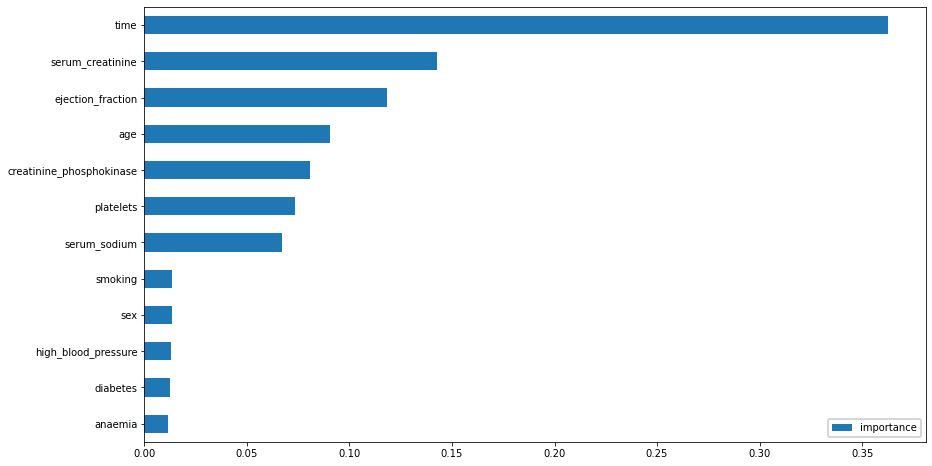

In [31]:
imp_values = feature_importances.sort_values('importance', ascending=True)
imp_values.plot.barh(figsize=(14,8), color='tab:blue')
plt.show()

Menampilkan ___feature importances___ (kepentingan fitur) berdasarkan classifier yang telah dilatih

In [32]:
feature_importances 

,importance
time,0.362765
serum_creatinine,0.142728
ejection_fraction,0.118082
age,0.090439
creatinine_phosphokinase,0.080725
platelets,0.073556
serum_sodium,0.067234
smoking,0.013649
sex,0.013568
high_blood_pressure,0.013133


Berdasarkan matriks korelasi dan seleksi fitur Random Forest, dapat ditentukan 4 fitur yang berkorelasi tinggi terhadap variabel target **('DEATH_EVENT')** sebagai berikut:
- age
- ejection_fraction
- serum_creatinine
- time

Menghapus atribut yang tidak digunakan

In [33]:
df_features = df_heart.drop(columns=['creatinine_phosphokinase', 'platelets', 'serum_sodium',
                                     'smoking', 'sex', 'high_blood_pressure', 'diabetes', 'anaemia'])

Melakukan pemisahan variabel independen (prediktor) dan variabel dependen (hasil) dengan hanya menggunakan fitur yang akan digunakan

In [34]:
X = df_features.iloc[:, :-1]
y = df_features.iloc[:, -1]
print(X.shape)
print(y.shape)

(299, 4)
(299,)


## 2. Menangani Ketidakseimbangan Kelas menggunakan SMOTE

SMOTE singkatan dari ___'Synthetic Minority Oversampling Technique'___ adalah teknik oversampling menggunakan sampel yang ada dari kelas minoritas.

In [35]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(y_sm.shape)

(406, 4)
(406,)


## 3. Menangani Skewness menggunakan Transformasi Box-Cox

**Transformasi Box Cox** merupakan suatu perhitungan yang dapat membantu kumpulan data mengikuti distribusi normal, adapun dalam kasus ini menggunakan transformasi Box-Cox karena semua menunjukkan ___positive skewness___ (lebih besar dari 0).

In [36]:
pt = PowerTransformer(method='box-cox')

Transformasi Box Cox untuk data tanpa oversampling

In [37]:
X_pt = pt.fit_transform(X)
X_pt

array([[ 1.17306132, -1.77349546,  1.15309217, -2.06393639],
       [-0.42323945,  0.10080015, -0.05905599, -1.98631054],
       [ 0.43434989, -1.77349546,  0.38309668, -1.95106725],
       ...,
       [-1.44664687,  1.67674538, -1.13410018,  1.65952527],
       [-1.44664687,  0.10080015,  0.55701427,  1.67793001],
       [-0.91023168,  0.65872023,  0.83992369,  1.72373776]])

Transformasi Box Cox untuk data dengan oversampling

In [38]:
X_pt_sm = pt.fit_transform(X_sm)
X_pt_sm

array([[ 1.09392757, -1.61063792,  1.00704764, -2.03471879],
       [-0.51178282,  0.24997157, -0.2475419 , -1.92128653],
       [ 0.34449906, -1.61063792,  0.20330868, -1.87174477],
       ...,
       [-0.75655034, -0.46340604,  0.72336091,  1.01871054],
       [ 1.95107305, -0.9908784 ,  1.71536116, -0.84508913],
       [-1.05575676, -1.61063792, -0.17759287, -0.70043181]])

Melakukan pemisahan variabel tanpa oversampling

In [39]:
X_selected = pd.DataFrame(X_pt, columns=X.columns)
df_1 = X_selected
df_1['DEATH_EVENT'] = y

X = df_1.iloc[:, :-1]
y = df_1.iloc[:, -1]
print(X.shape)
print(y.shape)

(299, 4)
(299,)


Melakukan pemisahan variabel dengan oversampling

In [40]:
X_selected_sm = pd.DataFrame(X_pt_sm, columns=X_sm.columns)
df_sm = X_selected_sm
df_sm['DEATH_EVENT'] = y_sm

X_sm = df_sm.iloc[:, :-1]
y_sm = df_sm.iloc[:, -1]
print(X_sm.shape)
print(y_sm.shape)

(406, 4)
(406,)


**Train-test split**

Membagi dataset menjadi data train dan data test, dengan ukuran test size = 20% dan train size = 80%

Membagi dataset tanpa oversampling

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

Membagi dataset dengan oversampling

In [42]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, stratify=y_sm, random_state = 42)

Stratified K-Fold cross-validation digunakan pada kasus ini karena terkait masalah klasifikasi

In [43]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 4. Melakukan penyetelan hyperparameter menggunakan RandomizedSearchCV

Pencarian acak atau ___random search___ merupakan metode mencari kombinasi secara acak dari hyperparameter terpilih dan menghasilkan kombinasi hyperparameter acak terbaik yang akan digunakan untuk melatih model.

### Penyetelan hyperparameter model Random Forest Classifier

In [44]:
rfs_model_sm = RandomForestClassifier(random_state = 0)
model_1_sm = rfs_model_sm.fit(X_train_sm, y_train_sm)

params_1_sm = {'bootstrap': [True],
              'max_depth' : [20, 25, 30, 35],
              'max_features' : ['sqrt'],
              'min_samples_split' : [8, 10, 12],
              'min_samples_leaf' : [3, 4, 5],
              'n_estimators': [300, 400, 500]}

rmcv_sm = RandomizedSearchCV(estimator=model_1_sm, param_distributions=params_1_sm, n_iter=50, cv=skf, random_state=0)
rmcv_sm.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=0), n_iter=50,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [20, 25, 30, 35],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [300, 400, 500]},
                   random_state=0)

Menampilkan akurasi dan kombinasi hyperparameter terbaik berdasarkan pencarian acak digunakan untuk pelatihan model pertama: Random Forest Classifier.

In [45]:
print(rmcv_sm.best_score_)
print(rmcv_sm.best_params_)

0.8607692307692307
{'n_estimators': 500, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


### Penyetelan hyperparameter model Extra-trees Classifier

In [46]:
trees_model_sm = ExtraTreesClassifier(random_state=0)
model_2_sm = trees_model_sm.fit(X_train_sm, y_train_sm)

params_2_sm = {'bootstrap': [True],
              'max_depth' : [5, 10, 15, 20],
              'max_features' : ['sqrt'],
              'min_samples_split' : [6, 8, 10],
              'min_samples_leaf' : [8, 10, 12],
              'n_estimators': [300, 400, 500, 700]}

rmcv2_sm = RandomizedSearchCV(estimator=model_2_sm, param_distributions=params_2_sm, n_iter=50, cv=skf, random_state=0)
rmcv2_sm.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=ExtraTreesClassifier(random_state=0), n_iter=50,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [8, 10, 12],
                                        'min_samples_split': [6, 8, 10],
                                        'n_estimators': [300, 400, 500, 700]},
                   random_state=0)

Menampilkan akurasi dan kombinasi hyperparameter terbaik berdasarkan pencarian acak digunakan untuk pelatihan model kedua: Extra-trees Classifier.

In [47]:
print(rmcv2_sm.best_score_)
print(rmcv2_sm.best_params_)

0.8547596153846154
{'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


### Penyetelan hyperparameter model Gradient Boosting Classifier

In [48]:
gbc_model_sm = GradientBoostingClassifier(random_state=0)
model_3_sm = gbc_model_sm.fit(X_train_sm, y_train_sm)

params_3_sm = {'subsample': [0.4, 0.5, 0.6],
               'n_estimators': [50, 100, 150],
               'min_samples_split': [8, 10, 12],
               'min_samples_leaf': [4, 6, 8, 12],
               'max_features': ['sqrt'],
               'max_depth': [4, 6, 8],
               'learning_rate': [0.01, 0.03, 0.05, 0.07]}

rmcv3_sm = RandomizedSearchCV(estimator=model_3_sm, param_distributions=params_3_sm, n_iter=50, cv=skf, random_state=0)
rmcv3_sm.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05,
                                                          0.07],
                                        'max_depth': [4, 6, 8],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.4, 0.5, 0.6]},
                   random_state=0)

Menampilkan akurasi dan kombinasi hyperparameter terbaik berdasarkan pencarian acak digunakan untuk pelatihan model ketiga: Gradient Boosting Classifier.

In [49]:
print(rmcv3_sm.best_score_)
print(rmcv3_sm.best_params_)

0.8825
{'subsample': 0.4, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.05}


### Penyetelan hyperparameter model AdaBoost Classifier

In [50]:
adaboost_model_sm = AdaBoostClassifier(random_state=0)
model_4_sm = adaboost_model_sm.fit(X_train_sm, y_train_sm)

params_4_sm = {'n_estimators': [2, 3, 4, 5, 6],
               'learning_rate': [0.05, 0.25, 0.50, 0.75]}

rmcv4_sm = RandomizedSearchCV(estimator=model_4_sm, param_distributions=params_4_sm, n_iter=20, cv=skf, random_state=0)
rmcv4_sm.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=0), n_iter=20,
                   param_distributions={'learning_rate': [0.05, 0.25, 0.5,
                                                          0.75],
                                        'n_estimators': [2, 3, 4, 5, 6]},
                   random_state=0)

Menampilkan akurasi dan kombinasi hyperparameter terbaik berdasarkan pencarian acak digunakan untuk pelatihan model keempat: AdaBoost Classifier.

In [51]:
print(rmcv4_sm.best_score_)
print(rmcv4_sm.best_params_)

0.8485096153846154
{'n_estimators': 6, 'learning_rate': 0.75}


# G. Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model oversampling dan tanpa oversampling sampai kompilasi model.

## Model pertama : Random Forest Classifier

- Model pertama yaitu Random Forest. Model ini sebagai alternatif dari Decision Tree karena melakukan perhitungan Decision Tree sebanyak beberapa kali, dalam hal ini menetapkan 'n_estimators' = 500 dan 'max_depth' = 20, maka dilakukan perhitungan Decision Tree sebanyak 500 kali dengan kedalaman maksimum pohonnya berjumlah 20.
- Mempertimbangkan akar kuadrat dari jumlah total fitur untuk menentukan pemisahan terbaik dengan menetapkan 'max_features'= 'sqrt'.
- Teknik resampling dilakukan dengan mengambil sampel data beserta pengembalian diatur sebagai 'bootstrap' = True.
- Jumlah sampel minimum untuk membagi internal node yaitu sebesar 12 dengan parameter 'min_sample_split' = 12, serta untuk sampel minimum yang diperlukan untuk berada di simpul daun yaitu sebesar 3 ditunjukkan dengan 'min_samples_leaf' = 3 dan 'random_state' = 0 untuk menjamin model agar menghasilkan nilai yang konsisten.
- Oleh karena itu, kombinasi hyperparameter terbaik berdasarkan pencarian acak akan digunakan untuk pelatihan model pertama: Random Forest.

In [52]:
params_1_ht = {'n_estimators': 500, 'min_samples_split': 12, 'min_samples_leaf': 3,
               'max_features': 'sqrt', 'max_depth': 20, 'random_state': 0, 'bootstrap': True}

rfs_model = RandomForestClassifier(**params_1_ht)
rfs_model_sm = RandomForestClassifier(**params_1_ht)

## Model kedua : Extra-Trees Classifier

Model kedua yaitu Extra Trees. Model ini merupakan algoritma pembelajaran mesin ensemble yang menggabungkan prediksi dari banyak pohon keputusan secara acak mengambil sampel fitur pada setiap ___split point___ (titik pemisahan) dari pohon keputusan, dalam hal ini menetapkan 'n_estimators' = 700 dan 'max_depth' = 10, maka dilakukan perhitungan Decision Tree sebanyak 700 kali dengan kedalaman maksimum pohonnya berjumlah 10. Kemudian, mempertimbangkan akar kuadrat dari jumlah total fitur untuk menentukan pemisahan terbaik yaitu dengan mengatur 'max_features'= 'sqrt'. Teknik resampling dilakukan dengan mengambil sampel data beserta pengembalian diatur sebagai 'bootstrap' = True. Jumlah sampel minimum untuk membagi internal node yaitu sebesar 10 ditunjukkan dengan 'min_sample_split' = 10, serta untuk sampel minimum yang diperlukan untuk berada di simpul daun yaitu sebesar 10 dengan 'min_samples_leaf' = 10 dan random_state = 0 untuk menjamin model agar menghasilkan nilai yang konsisten. Oleh karena itu, kombinasi hyperparameter terbaik berdasarkan pencarian acak akan digunakan untuk pelatihan model kedua: Extra-trees.

In [53]:
params_2_ht = {'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 10,
               'max_features': 'sqrt', 'max_depth': 10, 'random_state': 42, 'bootstrap': True}

trees_model = ExtraTreesClassifier(**params_2_ht)
trees_model_sm = ExtraTreesClassifier(**params_2_ht)

## Model ketiga : Gradient Boosting Classifier

Model ketiga yaitu Gradient Boosting. Gradient Boosting termasuk dalam kategori metode peningkatan, yang secara iteratif belajar dari model prediksi lemah untuk mencoba memprediksi kesalahan yang ditinggalkan oleh model sebelumnya agar dapat membangun model dengan performa yang lebih baik. Dalam hal ini menetapkan 'n_estimators' = 150 dan 'max_depth' = 6, maka dilakukan perhitungan Decision Tree sebanyak 150 kali dengan kedalaman maksimum pohonnya bernilai 6. Learning rate = 0.05 berarti model tidak terlalu cepat belajar karena mendekati 0 (jauh dari 1), Subsample = 0.4, maka sampel dengan fraksi 0.4 yang digunakan untuk menyesuaikan ___base learners___ (model tunggal) dalam mengurangi varians. Kemudian, mempertimbangkan akar kuadrat dari jumlah total fitur untuk menentukan pemisahan terbaik yaitu dengan parameter 'max_features'= 'sqrt'. Jumlah sampel minimum untuk membagi internal node yaitu sebesar 10 ditunjukkan dengan 'min_sample_split' = 10, serta untuk sampel minimum yang diperlukan untuk berada di simpul daun yaitu sebesar 12 dengan 'min_samples_leaf' = 12 dan 'random_state' = 0 untuk menjamin model agar menghasilkan nilai yang konsisten. Oleh karena itu, kombinasi hyperparameter terbaik berdasarkan pencarian acak akan digunakan untuk pelatihan model ketiga: Gradient Boosting.

In [54]:
params_3_ht  = {'subsample': 0.4, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 12,
                'max_features': 'sqrt', 'max_depth': 6, 'random_state' : 0, 'learning_rate': 0.05}

gbc_model = GradientBoostingClassifier(**params_3_ht)
gbc_model_sm = GradientBoostingClassifier(**params_3_ht)

## Model keempat : AdaBoost Classifier

Model keempat yaitu AdaBoost. Model ini menggunakan pendekatan berulang untuk belajar dari kesalahan pengklasifikasi yang lemah, dan mengubahnya menjadi kuat (performa baik). ___learning rate___ (tingkat pembelajaran) sangat bergantung pada n_estimator (jumlah pohon). Lebih banyak pohon memungkinkan tingkat pembelajaran yang lebih kecil, maka 'n_estimators' = 6, dan 'learning_rate' = 0.75.

In [55]:
params_4_ht  = {'n_estimators': 6, 'learning_rate': 0.75, 'random_state' : 42}

adaboost_model = AdaBoostClassifier(**params_4_ht)
adaboost_model_sm = AdaBoostClassifier(**params_4_ht)

# H. Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

**Melatih model tanpa oversampling**

Model pertama : Random Forest Classifier

In [56]:
model_1 = rfs_model.fit(X_train, y_train)

Model kedua : Extra-trees Classifier

In [57]:
model_2 = trees_model_sm.fit(X_train, y_train)

Model ketiga : Gradient Boosting Classifier

In [58]:
model_3 = gbc_model.fit(X_train, y_train)

Model keempat : AdaBoost Classifier

In [59]:
model_4 = adaboost_model.fit(X_train, y_train)

**Melatih model dengan oversampling**

Model pertama : Random Forest Classifier

In [60]:
model_1_sm = rfs_model_sm.fit(X_train_sm, y_train_sm)

Model kedua : Extra-trees Classifier

In [61]:
model_2_sm = trees_model_sm.fit(X_train_sm, y_train_sm)

Model ketiga : Gradient Boosting Classifier

In [62]:
model_3_sm = gbc_model_sm.fit(X_train_sm, y_train_sm)

Model keempat : AdaBoost Classifier

In [63]:
model_4_sm = adaboost_model_sm.fit(X_train_sm, y_train_sm)

# I. Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

Membuat fungsi evaluate_model untuk memudahkan evaluasi model terkait masalah klasifikasi

In [64]:
def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1-Score: ", f1_score(y_test, y_pred))

## Random Forest Classifier

**Evaluasi model pertama tanpa oversampling**

Menampilkan ___train data score___ (skor data latih), ___test data score___ (skor data test), confusion matrix, dan ___classification report___  (laporan klasifikasi) untuk mengukur performa hasil
pengujian model pertama : **Random Forest Classifier**.

In [65]:
y_pred_1 = model_1.predict(X_test)
print(f"Train Data Score: {model_1.score(X_train, y_train)}")
print(f"Test Data Score: {model_1.score(X_test, y_test)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_1))

Train Data Score: 0.9205020920502092
Test Data Score: 0.8333333333333334

Confusion Matrix:
[[38  3]
 [ 7 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



Membuat dataframe untuk menampilkan accuracy, precision, recall, dan f1-score dalam persen (%) pada model pertama : Random Forest Classifier.

In [66]:
accuracy_1 = round(accuracy_score(y_test, y_pred_1), 4) * 100
precision_1 = round(precision_score(y_test, y_pred_1), 4) * 100
recall_1 = round(recall_score(y_test, y_pred_1), 4) * 100
f1score_1 = round(f1_score(y_test, y_pred_1), 4) * 100

index_1 = ['Random Forest']
data_1 = {'Accuracy %' : accuracy_1, 'Precision %' : precision_1,
            'Recall %' : recall_1, 'F1-Score %' : f1score_1}

df_metrics_1 = pd.DataFrame(data=data_1, index=index_1)
df_metrics_1 = np.transpose(df_metrics_1)

**Evaluasi model pertama dengan oversampling**

Menampilkan ___train data score___ (skor data latih), ___test data score___ (skor data test), confusion matrix, dan ___classification report___  (laporan klasifikasi) untuk mengukur performa hasil
pengujian model pertama : **Random Forest Classifier**.

In [67]:
y_pred_1_sm = model_1_sm.predict(X_test_sm)
print(f"Train Data Score: {model_1_sm.score(X_train_sm, y_train_sm)}")
print(f"Test Data Score: {model_1_sm.score(X_test_sm, y_test_sm)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_sm, y_pred_1_sm))
print("\nClassification Report:")
print(classification_report(y_test_sm, y_pred_1_sm))

Train Data Score: 0.9320987654320988
Test Data Score: 0.8902439024390244

Confusion Matrix:
[[36  5]
 [ 4 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.88      0.90      0.89        41

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



Membuat dataframe untuk menampilkan accuracy, precision, recall, dan f1-score dalam persen (%) pada model pertama : Random Forest Classifier.

In [68]:
accuracy_1_sm = round(accuracy_score(y_test_sm, y_pred_1_sm), 4) * 100
precision_1_sm = round(precision_score(y_test_sm, y_pred_1_sm), 4) * 100
recall_1_sm = round(recall_score(y_test_sm, y_pred_1_sm), 4) * 100
f1score_1_sm = round(f1_score(y_test_sm, y_pred_1_sm), 4) * 100

index_1_sm = ['Random Forest (SMOTE)']
data_1_sm = {'Accuracy %' : accuracy_1_sm, 'Precision %' : precision_1_sm,
            'Recall %' : recall_1_sm, 'F1-Score %' : f1score_1_sm }

df_metrics_1_sm = pd.DataFrame(data=data_1_sm, index=index_1_sm)
df_metrics_1_sm = np.transpose(df_metrics_1_sm)

**Menampilkan visualisasi confusion matrix model pertama : Random Forest Classifier**

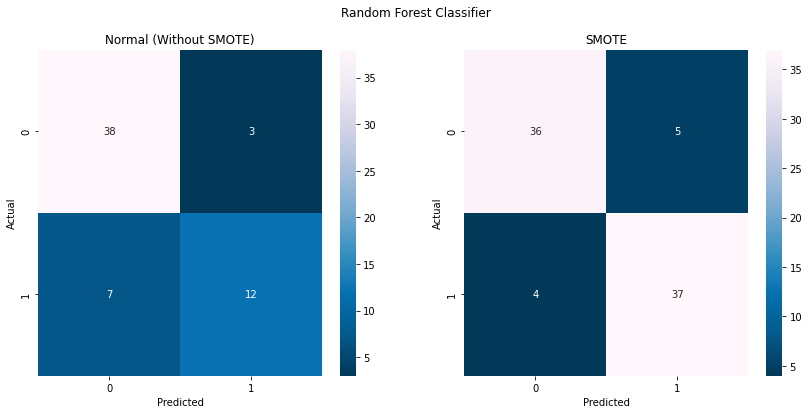

In [69]:
cm_rfs = confusion_matrix(y_test, y_pred_1)
cm_rfs_sm = confusion_matrix(y_test_sm, y_pred_1_sm)

fig, (ax1, ax2) =plt.subplots(1,2,figsize=(14,6))

fig.suptitle('Random Forest Classifier')

sns.heatmap(cm_rfs, annot=True, fmt="d", cmap='PuBu_r', ax=ax1)
ax1.set_title('Normal (Without SMOTE)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_rfs_sm, annot=True, fmt="d", cmap='PuBu_r', ax=ax2)
ax2.set_title('SMOTE')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()

Menampilkan **classification report** (laporan klasifikasi) untuk mengukur performa hasil pengujian model pertama  tanpa oversampling

In [70]:
evaluate_model(y_test, y_pred_1)

Accuracy Score:  0.8333333333333334
Precision Score:  0.8
Recall Score:  0.631578947368421
F1-Score:  0.7058823529411765


Menampilkan **classification report** (laporan klasifikasi) untuk mengukur performa hasil pengujian model pertama dengan oversampling

In [71]:
evaluate_model(y_test_sm, y_pred_1_sm)

Accuracy Score:  0.8902439024390244
Precision Score:  0.8809523809523809
Recall Score:  0.9024390243902439
F1-Score:  0.8915662650602411


Menampilkan perbandingan **classification report** (laporan klasifikasi) untuk membandingkan performa hasil pengujian model pertama dengan oversampling dan tanpa oversampling.

In [72]:
df_rfs_metrics = pd.concat([df_metrics_1, df_metrics_1_sm], axis=1)
df_rfs_metrics 

,Random Forest,Random Forest (SMOTE)
Accuracy %,83.33,89.02
Precision %,80.00,88.10
Recall %,63.16,90.24
F1-Score %,70.59,89.16


## Extra Tree Classifier

**Evaluasi model pertama tanpa oversampling**

Menampilkan **train data score**, **test data score** , **confusion matrix**, dan **classification report** untuk mengukur performa hasil pengujian model kedua : **Extra-trees Classifier**.

In [73]:
y_pred_2 = model_2.predict(X_test)
print(f"Train Data Score: {model_2.score(X_train, y_train)}")
print(f"Test Data Score: {model_2.score(X_test, y_test)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_2))

Train Data Score: 0.8326359832635983
Test Data Score: 0.7833333333333333

Confusion Matrix:
[[32  9]
 [ 4 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.62      0.79      0.70        19

    accuracy                           0.78        60
   macro avg       0.76      0.78      0.76        60
weighted avg       0.81      0.78      0.79        60



Membuat dataframe untuk menampilkan accuracy, precision, recall, dan f1-score dalam persen (%) pada model kedua : Extra-trees Classifier.

In [74]:
accuracy_2 = round(accuracy_score(y_test, y_pred_2), 4) * 100
precision_2 = round(precision_score(y_test, y_pred_2), 4) * 100
recall_2 = round(recall_score(y_test, y_pred_2), 4) * 100
f1score_2 = round(f1_score(y_test, y_pred_2), 4) * 100

index_2 = ['Extra-trees Classifier']
data_2 = {'Accuracy %' : accuracy_2, 'Precision %' : precision_2,
            'Recall %' : recall_2, 'F1-Score %' : f1score_2}

df_metrics_2 = pd.DataFrame(data=data_2, index=index_2)
df_metrics_2 = np.transpose(df_metrics_2)

**Evaluasi model kedua dengan oversampling**

Menampilkan **train data score**, **test data score** , **confusion matrix**, dan **classification report** untuk mengukur performa hasil pengujian model kedua : **Extra-trees Classifier**.

In [75]:
y_pred_2_sm = model_2_sm.predict(X_test_sm)
print(f"Train Data Score: {model_2_sm.score(X_train_sm, y_train_sm)}")
print(f"Test Data Score: {model_2_sm.score(X_test_sm, y_test_sm)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_sm, y_pred_2_sm))
print("\nClassification Report:")
print(classification_report(y_test_sm, y_pred_2_sm))

Train Data Score: 0.8580246913580247
Test Data Score: 0.8536585365853658

Confusion Matrix:
[[37  4]
 [ 8 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.89      0.80      0.85        41

    accuracy                           0.85        82
   macro avg       0.86      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82



Membuat dataframe untuk menampilkan accuracy, precision, recall, dan f1-score dalam persen (%) pada model kedua : Extra-trees Classifier.

In [76]:
accuracy_2_sm = round(accuracy_score(y_test_sm, y_pred_2_sm), 4) * 100
precision_2_sm = round(precision_score(y_test_sm, y_pred_2_sm), 4) * 100
recall_2_sm = round(recall_score(y_test_sm, y_pred_2_sm), 4) * 100
f1score_2_sm = round(f1_score(y_test_sm, y_pred_2_sm), 4) * 100

index_2_sm = ['Extra-trees Classifier (SMOTE)']
data_2_sm = {'Accuracy %' : accuracy_2_sm, 'Precision %' : precision_2_sm,
            'Recall %' : recall_2_sm, 'F1-Score %' : f1score_2_sm }

df_metrics_2_sm = pd.DataFrame(data=data_2_sm, index=index_2_sm)
df_metrics_2_sm = np.transpose(df_metrics_2_sm)

**Menampilkan visualisasi confusion matrix model kedua : Extra-trees Classifier**

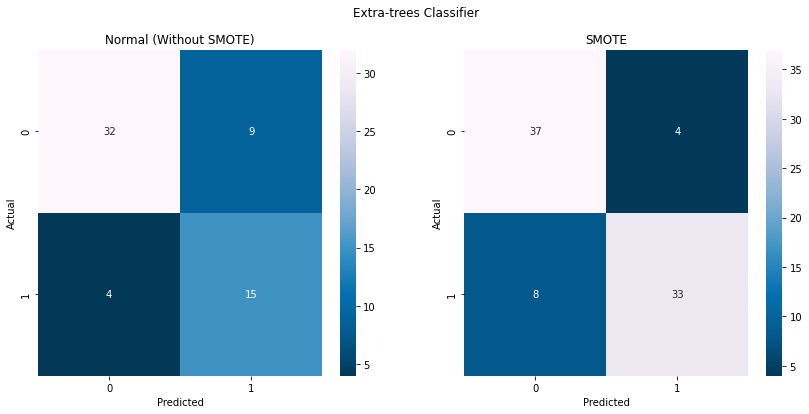

In [77]:
cm_trees = confusion_matrix(y_test, y_pred_2)
cm_trees_sm = confusion_matrix(y_test_sm, y_pred_2_sm)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))

fig.suptitle('Extra-trees Classifier')

sns.heatmap(cm_trees, annot=True, fmt="d", cmap='PuBu_r', ax=ax1)
ax1.set_title('Normal (Without SMOTE)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_trees_sm, annot=True, fmt="d", cmap='PuBu_r', ax=ax2)
ax2.set_title('SMOTE')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()

Menampilkan **classification report** untuk mengukur performa hasil pengujian model kedua tanpa oversampling

In [78]:
evaluate_model(y_test, y_pred_2)

Accuracy Score:  0.7833333333333333
Precision Score:  0.625
Recall Score:  0.7894736842105263
F1-Score:  0.6976744186046512


Menampilkan **classification report** untuk mengukur performa hasil pengujian model kedua dengan oversampling

In [79]:
evaluate_model(y_test_sm, y_pred_2_sm)

Accuracy Score:  0.8536585365853658
Precision Score:  0.8918918918918919
Recall Score:  0.8048780487804879
F1-Score:  0.8461538461538461


Menampilkan **classification report** untuk membandingkan performa hasil pengujian model kedua dengan oversampling dan tanpa oversampling.

In [80]:
df_trees_metrics = pd.concat([df_metrics_2, df_metrics_2_sm], axis=1)
df_trees_metrics 

,Extra-trees Classifier,Extra-trees Classifier (SMOTE)
Accuracy %,78.33,85.37
Precision %,62.50,89.19
Recall %,78.95,80.49
F1-Score %,69.77,84.62


## Gradient Boosting Classifier

**Evaluasi model ketiga tanpa oversampling**

Menampilkan **train data score**, **test data score** , **confusion matrix**, dan **classification report** untuk mengukur performa hasil pengujian model ketiga : **Gradient Booosting Classifier**.

In [81]:
y_pred_3 = model_3.predict(X_test)
print(f"Train Data Score: {model_3.score(X_train, y_train)}")
print(f"Test Data Score: {model_3.score(X_test, y_test)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_3))

Train Data Score: 0.9330543933054394
Test Data Score: 0.85

Confusion Matrix:
[[39  2]
 [ 7 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



Membuat dataframe untuk menampilkan accuracy, precision, recall, dan f1-score dalam persen (%) pada model ketiga : Gradient Boosting Classifier.

In [82]:
accuracy_3 = round(accuracy_score(y_test, y_pred_3), 4) * 100
precision_3 = round(precision_score(y_test, y_pred_3), 4) * 100
recall_3 = round(recall_score(y_test, y_pred_3), 4) * 100
f1score_3 = round(f1_score(y_test, y_pred_3), 4) * 100

index_3 = ['Gradient Boosting Classifier']
data_3 = {'Accuracy %' : accuracy_3, 'Precision %' : precision_3,
            'Recall %' : recall_3, 'F1-Score %' : f1score_3}

df_metrics_3 = pd.DataFrame(data=data_3, index=index_3)
df_metrics_3 = np.transpose(df_metrics_3)

**Evaluasi model ketiga dengan oversampling**

Menampilkan **train data score**, **test data score** , **confusion matrix**, dan **classification report** untuk mengukur performa hasil pengujian model ketiga : **Gradient Booosting Classifier**.

In [83]:
y_pred_3_sm = model_3_sm.predict(X_test_sm)
print(f"Train Data Score: {model_3_sm.score(X_train_sm, y_train_sm)}")
print(f"Test Data Score: {model_3_sm.score(X_test_sm, y_test_sm)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_sm, y_pred_3_sm))
print("\nClassification Report:")
print(classification_report(y_test_sm, y_pred_3_sm))

Train Data Score: 0.9382716049382716
Test Data Score: 0.9024390243902439

Confusion Matrix:
[[38  3]
 [ 5 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.92      0.88      0.90        41

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



Membuat dataframe untuk menampilkan accuracy, precision, recall, dan f1-score dalam persen (%) pada model ketiga : Gradient Boosting Classifier.

In [84]:
accuracy_3_sm = round(accuracy_score(y_test_sm, y_pred_3_sm), 4) * 100
precision_3_sm = round(precision_score(y_test_sm, y_pred_3_sm), 4) * 100
recall_3_sm = round(recall_score(y_test_sm, y_pred_3_sm), 4) * 100
f1score_3_sm = round(f1_score(y_test_sm, y_pred_3_sm), 4) * 100

index_3_sm = ['Gradient Boosting Classifier (SMOTE)']
data_3_sm = {'Accuracy %' : accuracy_3_sm, 'Precision %' : precision_3_sm,
            'Recall %' : recall_3_sm, 'F1-Score %' : f1score_3_sm }

df_metrics_3_sm = pd.DataFrame(data=data_3_sm, index=index_3_sm)
df_metrics_3_sm = np.transpose(df_metrics_3_sm)

**Menampilkan visualisasi confusion matrix model ketiga : Gradient Boosting Classifier**

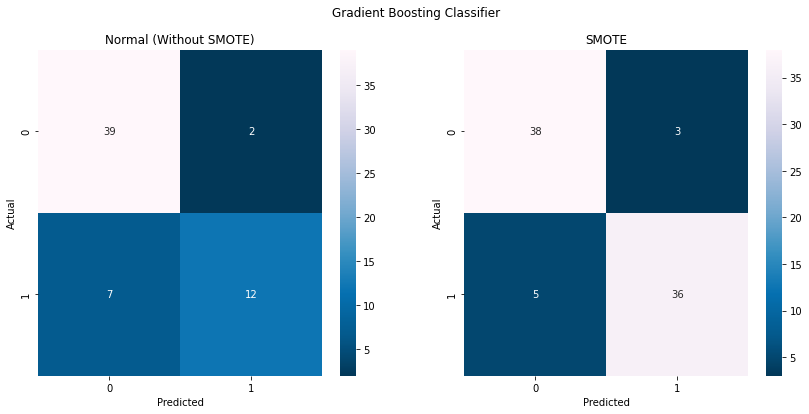

In [85]:
cm_gbc = confusion_matrix(y_test, y_pred_3)
cm_gbc_sm = confusion_matrix(y_test_sm, y_pred_3_sm)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

fig.suptitle('Gradient Boosting Classifier')

sns.heatmap(cm_gbc, annot=True, fmt="d", cmap='PuBu_r', ax=ax1)
ax1.set_title('Normal (Without SMOTE)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_gbc_sm, annot=True, fmt="d", cmap='PuBu_r', ax=ax2)
ax2.set_title('SMOTE')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()

Menampilkan **classification report** untuk mengukur performa hasil pengujian model ketiga tanpa oversampling

In [86]:
evaluate_model(y_test, y_pred_3)

Accuracy Score:  0.85
Precision Score:  0.8571428571428571
Recall Score:  0.631578947368421
F1-Score:  0.7272727272727273


Menampilkan **classification report** untuk mengukur performa hasil pengujian model ketiga dengan oversampling

In [87]:
evaluate_model(y_test_sm, y_pred_3_sm)

Accuracy Score:  0.9024390243902439
Precision Score:  0.9230769230769231
Recall Score:  0.8780487804878049
F1-Score:  0.9


Menampilkan **classification report** untuk membandingkan performa hasil pengujian model ketiga dengan oversampling dan tanpa oversampling.

In [88]:
df_gbc_metrics = pd.concat([df_metrics_3, df_metrics_3_sm], axis=1)
df_gbc_metrics 

,Gradient Boosting Classifier,Gradient Boosting Classifier (SMOTE)
Accuracy %,85.00,90.24
Precision %,85.71,92.31
Recall %,63.16,87.80
F1-Score %,72.73,90.00


## AdaBoost Classifier

Menampilkan **train data score**, **test data score** , **confusion matrix**, dan **classification report** untuk mengukur performa hasil pengujian model keempat : **AdaBoost Classifier**.

In [89]:
y_pred_4 = model_4.predict(X_test)
print(f"Train Data Score: {model_4.score(X_train, y_train)}")
print(f"Test Data Score: {model_4.score(X_test, y_test)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_4))

Train Data Score: 0.8870292887029289
Test Data Score: 0.8166666666666667

Confusion Matrix:
[[40  1]
 [10  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



Membuat dataframe untuk menampilkan accuracy, precision, recall, dan f1-score dalam persen (%) pada model keempat : AdaBoost Classifier.

In [90]:
accuracy_4 = round(accuracy_score(y_test, y_pred_4), 4) * 100
precision_4 = round(precision_score(y_test, y_pred_4), 4) * 100
recall_4 = round(recall_score(y_test, y_pred_4), 4) * 100
f1score_4 = round(f1_score(y_test, y_pred_4), 4) * 100

index_4 = ['AdaBoost Classifier']
data_4 = {'Accuracy %' : accuracy_4, 'Precision %' : precision_4,
            'Recall %' : recall_4, 'F1-Score %' : f1score_4}

df_metrics_4 = pd.DataFrame(data=data_4, index=index_4)
df_metrics_4 = np.transpose(df_metrics_4)

**Evaluasi model keempat dengan oversampling**

In [91]:
y_pred_4_sm = model_4_sm.predict(X_test_sm)
print(f"Train Data Score: {model_4_sm.score(X_train_sm, y_train_sm)}")
print(f"Test Data Score: {model_4_sm.score(X_test_sm, y_test_sm)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_sm, y_pred_4_sm))
print("\nClassification Report:")
print(classification_report(y_test_sm, y_pred_4_sm))

Train Data Score: 0.8734567901234568
Test Data Score: 0.8414634146341463

Confusion Matrix:
[[36  5]
 [ 8 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.87      0.80      0.84        41

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



Membuat dataframe untuk menampilkan accuracy, precision, recall, dan f1-score dalam persen (%) pada model keempat : AdaBoost Classifier.

In [92]:
accuracy_4_sm = round(accuracy_score(y_test_sm, y_pred_4_sm), 4) * 100
precision_4_sm = round(precision_score(y_test_sm, y_pred_4_sm), 4) * 100
recall_4_sm = round(recall_score(y_test_sm, y_pred_4_sm), 4) * 100
f1score_4_sm = round(f1_score(y_test_sm, y_pred_4_sm), 4) * 100

index_4_sm = ['AdaBoost Classifier (SMOTE)']
data_4_sm = {'Accuracy %' : accuracy_4_sm, 'Precision %' : precision_4_sm,
            'Recall %' : recall_4_sm, 'F1-Score %' : f1score_4_sm }

df_metrics_4_sm = pd.DataFrame(data=data_4_sm, index=index_4_sm)
df_metrics_4_sm = np.transpose(df_metrics_4_sm)

**Menampilkan visualisasi confusion matrix model keempat : AdaBoost Classifier**

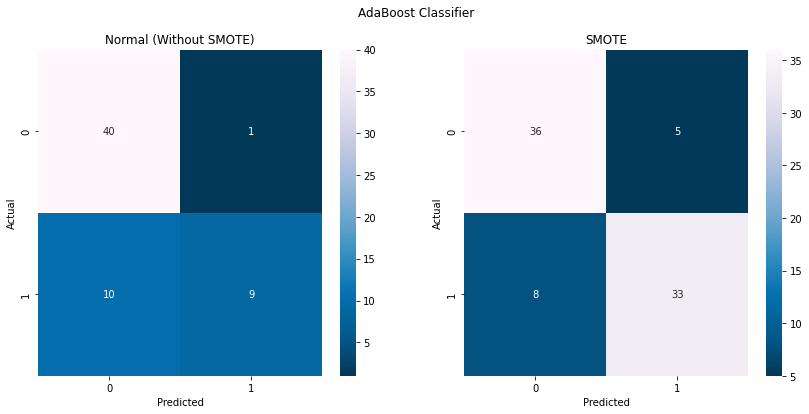

In [93]:
cm_adaboost = confusion_matrix(y_test, y_pred_4)
cm_adaboost_sm = confusion_matrix(y_test_sm, y_pred_4_sm)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

fig.suptitle('AdaBoost Classifier')

sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap='PuBu_r', ax=ax1)
ax1.set_title('Normal (Without SMOTE)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_adaboost_sm, annot=True, fmt="d", cmap='PuBu_r', ax=ax2)
ax2.set_title('SMOTE')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()

Menampilkan **classification report** untuk membandingkan performa hasil pengujian model keempat dengan oversampling dan tanpa oversampling.

In [94]:
df_adaboost_metrics = pd.concat([df_metrics_4, df_metrics_4_sm], axis=1)
df_adaboost_metrics 

,AdaBoost Classifier,AdaBoost Classifier (SMOTE)
Accuracy %,81.67,84.15
Precision %,90.00,86.84
Recall %,47.37,80.49
F1-Score %,62.07,83.54


Menampilkan **classification report** untuk mengukur performa hasil pengujian model keempat tanpa oversampling

In [95]:
evaluate_model(y_test, y_pred_4)

Accuracy Score:  0.8166666666666667
Precision Score:  0.9
Recall Score:  0.47368421052631576
F1-Score:  0.6206896551724138


Menampilkan **classification report** untuk mengukur performa hasil pengujian model keempat dengan oversampling

In [96]:
evaluate_model(y_test_sm, y_pred_4_sm)

Accuracy Score:  0.8414634146341463
Precision Score:  0.868421052631579
Recall Score:  0.8048780487804879
F1-Score:  0.8354430379746836


**Skor akurasi untuk setiap model tanpa oversampling**

In [97]:
print("Akurasi Model Random Forest:", round(accuracy_score(y_test, y_pred_1), 4) * 100)
print("Akurasi Model Extra-trees Classifier:", round(accuracy_score(y_test, y_pred_2), 4) * 100)
print("Akurasi Model Gradient Boosting Classifier:", round(accuracy_score(y_test, y_pred_3), 4) * 100)
print("Akurasi Model AdaBoost Classifier:", round(accuracy_score(y_test, y_pred_4), 4) * 100)

Akurasi Model Random Forest: 83.33
Akurasi Model Extra-trees Classifier: 78.33
Akurasi Model Gradient Boosting Classifier: 85.0
Akurasi Model AdaBoost Classifier: 81.67


**Skor akurasi untuk setiap model menggunakan oversampling**

In [98]:
print("Akurasi Model Random Forest:", round(accuracy_score(y_test_sm, y_pred_1_sm), 4) * 100)
print("Akurasi Model Extra-trees Classifier:", round(accuracy_score(y_test_sm, y_pred_2_sm), 4) *100)
print("Akurasi Model Gradient Boosting Classifier:", round(accuracy_score(y_test_sm, y_pred_3_sm), 4) * 100)
print("Akurasi Model AdaBoost Classifier:", round(accuracy_score(y_test_sm, y_pred_4_sm), 4) * 100)

Akurasi Model Random Forest: 89.02
Akurasi Model Extra-trees Classifier: 85.37
Akurasi Model Gradient Boosting Classifier: 90.24
Akurasi Model AdaBoost Classifier: 84.15


## Analisis kurva ROC tanpa oversampling

#### Mengimplementasikan predict_proba() pada setiap model tanpa oversampling yang digunakan untuk memprediksi probabilitas kelas target

In [99]:
y_pred_rfs_proba_1 = model_1.predict_proba(X_test)
y_pred_trees_proba_1 = model_2.predict_proba(X_test)
y_pred_gbc_proba_1 = model_3.predict_proba(X_test)
y_pred_adaboost_proba_1 = model_4.predict_proba(X_test)

**Memvisualisasikan kurva ROC keempat model tanpa oversampling untuk membandingkan akurasinya**

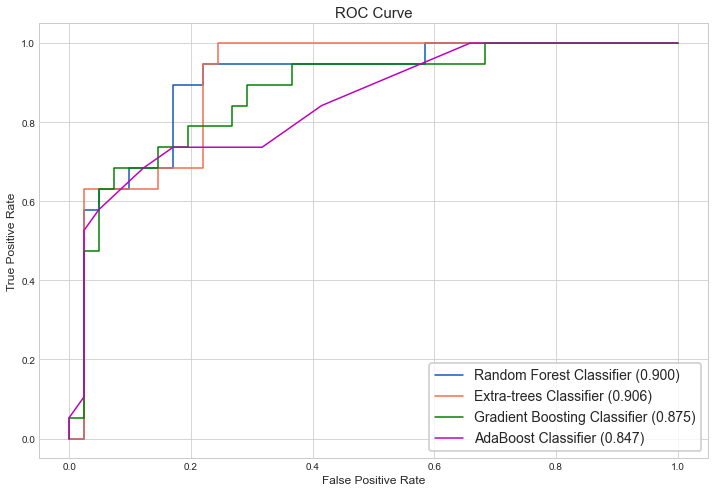

In [100]:
fpr_rfs_1, tpr_rfs_1, threshold_rfs_1 = roc_curve(y_test, y_pred_rfs_proba_1[:,1])
auc_score_1 = auc(fpr_rfs_1, tpr_rfs_1)
fpr_trees_1, tpr_trees_1, threshold_trees_1 = roc_curve(y_test, y_pred_trees_proba_1[:,1])
auc_score_2 = auc(fpr_trees_1, tpr_trees_1)
fpr_gbc_1, tpr_gbc_1, threshold_gbc_1 = roc_curve(y_test, y_pred_gbc_proba_1[:,1])
auc_score_3 = auc(fpr_gbc_1, tpr_gbc_1)
fpr_adaboost_1, tpr_adaboost_1, threshold_adaboost_1 = roc_curve(y_test, y_pred_adaboost_proba_1[:,1])
auc_score_4 = auc(fpr_adaboost_1, tpr_adaboost_1)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 8))
plt.plot(fpr_rfs_1, tpr_rfs_1, '-', color='#1058B5', label='Random Forest Classifier (%0.3f)' % auc_score_1)
plt.plot(fpr_trees_1, tpr_trees_1, '-', color='#F36C50', label='Extra-trees Classifier (%0.3f)' % auc_score_2)
plt.plot(fpr_gbc_1, tpr_gbc_1, '-', color='g', label="Gradient Boosting Classifier (%0.3f)" % auc_score_3)
plt.plot(fpr_adaboost_1, tpr_adaboost_1, '-', color='m', label="AdaBoost Classifier (%0.3f)" % auc_score_4)

plt.legend(loc='lower right', prop={'size': 14}, frameon=True)
plt.title("ROC Curve", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.show()

Mengubah bentuk desimal menjadi persen untuk kebutuhan analisis model

In [101]:
auc_score_1_pn = round((auc_score_1), 4) * 100
auc_score_2_pn = round((auc_score_2), 4) * 100
auc_score_3_pn = round((auc_score_3), 4) * 100
auc_score_4_pn = round((auc_score_4), 4) * 100

### Analisis kurva ROC dengan oversampling

#### Mengimplementasikan predict_proba() pada setiap model dengan oversampling yang digunakan untuk memprediksi probabilitas kelas target

In [102]:
y_pred_rfs_proba = model_1_sm.predict_proba(X_test_sm)
y_pred_trees_proba = model_2_sm.predict_proba(X_test_sm)
y_pred_gbc_proba = model_3_sm.predict_proba(X_test_sm)
y_pred_adaboost_proba = model_4_sm.predict_proba(X_test_sm)

#### Memvisualisasikan kurva ROC keempat model dengan oversampling untuk membandingkan akurasinya

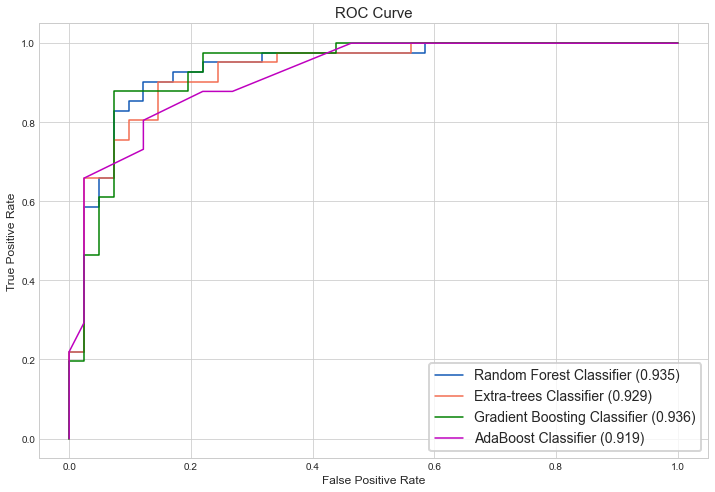

In [103]:
fpr_rfs, tpr_rfs, threshold_rfs = roc_curve(y_test_sm, y_pred_rfs_proba[:,1])
auc_score_sm1 = auc(fpr_rfs, tpr_rfs)
fpr_trees, tpr_trees, threshold_trees = roc_curve(y_test_sm, y_pred_trees_proba[:,1])
auc_score_sm2 = auc(fpr_trees, tpr_trees)
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test_sm, y_pred_gbc_proba[:,1])
auc_score_sm3 = auc(fpr_gbc, tpr_gbc)
fpr_adaboost, tpr_adaboost, threshold_adaboost = roc_curve(y_test_sm, y_pred_adaboost_proba[:,1])
auc_score_sm4 = auc(fpr_adaboost, tpr_adaboost)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 8))
plt.plot(fpr_rfs, tpr_rfs, '-', color='#1058B5', label='Random Forest Classifier (%0.3f)' % auc_score_sm1)
plt.plot(fpr_trees, tpr_trees,  '-', color='#F36C50', label='Extra-trees Classifier (%0.3f)' % auc_score_sm2)
plt.plot(fpr_gbc, tpr_gbc, '-', color='g', label="Gradient Boosting Classifier (%0.3f)" % auc_score_sm3)
plt.plot(fpr_adaboost, tpr_adaboost, '-', color='m', label="AdaBoost Classifier (%0.3f)" % auc_score_sm4)

plt.legend(loc='lower right', prop={'size': 14}, frameon=True)
plt.title("ROC Curve", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.show()

Mengubah bentuk desimal menjadi persen untuk kebutuhan analisis model

In [104]:
auc_score_1_pnsm = round((auc_score_sm1), 4) * 100
auc_score_2_pnsm = round((auc_score_sm2), 4) * 100
auc_score_3_pnsm = round((auc_score_sm3), 4) * 100
auc_score_4_pnsm = round((auc_score_sm4), 4) * 100

### Merangkum hasil evaluasi model

Membuat dataframe untuk menampilkan dan membandingkan accuracy, precision, recall, dan f1-score dalam persen (%) untuk keseluruhan model dengan oversampling dan tanpa oversampling.

In [105]:
index_eval_sm = ['Random Forest Classifier', 'Random Forest Classifier (SMOTE)', 'Extra-trees Classifier', 
                 'Extra-trees Classifier (SMOTE)', 'Gradient Boosting Classifier', 'Gradient Boosting Classifier (SMOTE)',
                 'AdaBoost Classifier', 'AdaBoost Classifier (SMOTE)']
data_eval_sm = {'Accuracy %' : [accuracy_1, accuracy_1_sm, accuracy_2, accuracy_2_sm, 
                              accuracy_3, accuracy_3_sm, accuracy_4, accuracy_4_sm],
                'Precision %' : [precision_1, precision_1_sm, precision_2, precision_2_sm, 
                               precision_3, precision_3_sm, precision_4, precision_4_sm],
                'Recall %' : [recall_1, recall_1_sm, recall_2, recall_2_sm,
                            recall_3, recall_3_sm, recall_4, recall_4_sm], 
                'F1-Score %' : [f1score_1, f1score_1_sm, f1score_2, f1score_2_sm,
                              f1score_3, f1score_3_sm, f1score_4, f1score_4_sm],
                'AUC %' : [auc_score_1_pn, auc_score_1_pnsm, auc_score_2_pn, auc_score_2_pnsm,
                         auc_score_3_pn, auc_score_3_pnsm, auc_score_4_pn, auc_score_4_pnsm]}

df_metrics_sm = pd.DataFrame(data=data_eval_sm, index=index_eval_sm)

**Menampilkan hasil evaluasi dari keseluruhan model**

In [106]:
df_metrics_sm

,Accuracy %,Precision %,Recall %,F1-Score %,AUC %
Random Forest Classifier,83.33,80.00,63.16,70.59,89.99
Random Forest Classifier (SMOTE),89.02,88.10,90.24,89.16,93.52
Extra-trees Classifier,78.33,62.50,78.95,69.77,90.63
Extra-trees Classifier (SMOTE),85.37,89.19,80.49,84.62,92.92
Gradient Boosting Classifier,85.00,85.71,63.16,72.73,87.55
Gradient Boosting Classifier (SMOTE),90.24,92.31,87.80,90.00,93.58
AdaBoost Classifier,81.67,90.00,47.37,62.07,84.72
AdaBoost Classifier (SMOTE),84.15,86.84,80.49,83.54,91.88


**Analisis model tanpa oversampling:**<br>
- Akurasi data pelatihan dan data pengujian tanpa oversampling memiliki nilai yang tidak mendekati. Maka, dapat memungkinkan terjadinya  overfitting.
- Berdasarkan evaluasi metrik, diperoleh false negatif dan false positive yang tidak mendekati. Maka, dapat menggunakan F1 Score sebagai acuan. 

**Analisis model dengan oversampling:**<br>
- Akurasi data pelatihan dan data pengujian dengan oversampling memiliki nilai yang relatif sangat mendekati. Maka, model cenderung tidak terjadi overfitting. Sehingga, model ini menggeneralisasi dengan baik untuk data baru yang tidak terlihat sebelumnya. Oleh karena itu, dapat dilakukan analisis lebih lanjut menggunakan data yang telah dilakukan oversampling sebelumnya.
- Keempat model memiliki skor akurasi, precision, recall, F1-score, dan AUC yang lebih baik jika dibandingkan dengan model tanpa oversampling, kecuali skor precision pada model AdaBoost mengalami penurunan dari 90% menjadi 86.84%.
- Terlihat bahwa skor AUC dengan oversampling jika dibandingkan tanpa oversampling, menunjukkan peningkatan nilai AUC dengan kisaran lebih dari 0.9 untuk setiap modelnya, maka keempat model tersebut mampu mengklasifikasikan fitur prediktor ke dalam target dengan baik.
- Berdasarkan evaluasi metrik, diperoleh false negatif dan false positive yang sangat mendekati. Selain itu distribusi kelas pun sudah seimbang. Maka, dapat menggunakan accuracy score sebagai acuan performa algoritma untuk pemilihan model. Akan tetapi  tujuan dari proyek ini yaitu mengimplementasikan model prediksi menggunakan Random Forest, sehingga model yang digunakan untuk kebutuhan deployment yaitu model pertama (Random Forest). Ketiga model lainnya dapat digunakan untuk analisis lebih lanjut diluar proyek ini.

---
# J. Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah dilatih akan dicoba pada data selain data yang sudah tersedia.

In [107]:
new_data = {'age' : [40, 32, 57, 70], 'ejection_fraction' : [70, 50, 30, 60],
            'serum_creatinine' : [1, 1, 2, 3], 'time' : [20, 73, 150, 19]}
new_data = pd.DataFrame(new_data)

In [108]:
y_pred_new1 = model_1_sm.predict(new_data)
print(f"Hasil prediksi pasien terkena serangan jantung: {y_pred_new1}")

Hasil prediksi pasien terkena serangan jantung: [0 0 1 1]


---
# K. Kesimpulan

Berdasarkan pengolahan analisis data yang telah dilakukan, diperoleh kesimpulan bahwa:

1. Fitur - fitur yang tidak berhubungan dengan jantung, seperti diabetes, gender, dan merokok kurang memberi pengaruh terhadap kemungkinan terkena serangan jantung.
2. Outlier yang terdapat didalam fitur - fitur tidak dihapus karena data outlier tersebut diobservasi secara fakta lapangan kesehatan.
3. 4 fitur dengan korelasi tertinggi dipegang oleh time, serum_creatinine, ejection_fraction, dan age.
4. Seseorang yang sudah dibantu oleh tenaga kesehatan sejak lama (> ~75 hari) lebih banyak peluang hidup dibandingkan mereka yang baru saja sebentar dibantu (<= ~75 hari).
5. Jumlah serum creatinine yang sudah melebihi 1 mg/dL lebih mudah terkena serangan jantung.
6. Persentase ejection fraction yang sudah dibawah 30% berpeluang terkena serangan jantung.
7. Semakin tua seseorang maka berpeluang juga untuk terkena serangan jantung.
8. Menggunakan 4 fitur yang paling berkorelasi terhadap kemungkinan terkena serangan jantung, yakni : 'age', 'ejection_fraction', 'serum_creatinine', 'time'.
9. Model Random Forest menjadi algoritma yang digunakan untuk melakukan prediksi kemungkinan terkena serangan jantung.
10. Penggunaan model Gradient Boosting, Extraa-trees, dan AdaBoost dapat dijadikan alternatif lain karena memiliki nilai metrik evaluasi yang baik.

---

In [109]:
pickle.dump(model_1_sm, open('model_rfs.pkl', 'wb'))